# Δεύτερη Άσκηση νευρωνικών

Ομάδα 49 <br>
Γιάννης Βουλγαρίδης, 03116151 <br>
Μαρία-Ιωάννα Σωτηρίου, 03116090 <br>
Ευάγγελος Ζάχος, 03116015 <br> 

# Εφαρμογή 1-Σύστημα Προτάσεων ταινιών

In [1]:
!pip install --upgrade somoclu

     |████████████████████████████████| 6.2MB 9.8MB/s 
  Created wheel for somoclu: filename=somoclu-1.7.5.1-cp36-cp36m-linux_x86_64.whl size=420924 sha256=fc6ae87eabf61aa4d345fbd96f6077fc9af3039e3aafe192d8c87b33c0eb737c
  Stored in directory: /root/.cache/pip/wheels/a6/e2/a0/4a61002b47e4965d7f59fd4c7ccf2e86a03ccad366f978d2a7
Successfully built somoclu


Σύμφωνα με τις οδηγίες της εκφώνησης το seed ορίζεται ίσο με 49.

In [2]:
#import data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
from nltk import word_tokenize          
from nltk.stem import PorterStemmer 
import nltk
class LemmaTokenizer(object):
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, articles):
        return [self.wnl.lemmatize(t) for t in word_tokenize(articles)]

dataset_url = "https://drive.google.com/uc?export=download&id=1PdkVDENX12tQliCk_HtUnAUbfxXvnWuG"
df_data_1 = pd.read_csv(dataset_url, sep='\t',  header=None, quoting=3, error_bad_lines=False)

print(df_data_1.shape)
team_seed_number = 49 
movie_seeds_url = "https://drive.google.com/uc?export=download&id=1EA_pUIgK5Ub3kEzFbFl8wSRqAV6feHqD"
df_data_2 = pd.read_csv(movie_seeds_url, header=None, error_bad_lines=False)
print(df_data_2.shape)

my_index = df_data_2.iloc[team_seed_number,:].values

titles = df_data_1.iloc[:, [2]].values[my_index] # movie titles (string)
categories = df_data_1.iloc[:, [3]].values[my_index] # movie categories (string)
bins = df_data_1.iloc[:, [4]]
catbins = bins[4].str.split(',', expand=True).values.astype(np.float)[my_index] # movie categories in binary form (1 feature per category)
summaries =  df_data_1.iloc[:, [5]].values[my_index] # movie summaries (string)
corpus = summaries[:,0].tolist() # list form of summaries


(22302, 6)
(128, 5000)


In [3]:
print(corpus[:3])

['The film depicts the family relations and romantic entanglements of two sisters involved in Internet dating.', 'Kate  and Alex  are a couple living in a New York City apartment with their teenage daughter, Abby . Kate and Alex own a furniture store specializing in used modern furniture, which they buy at estate sales. They have bought the apartment adjacent to theirs, but its occupant, the elderly and cranky Andra , will stay in it until she dies. Andra has two granddaughters, the dutiful and generous Rebecca , a breast cancer radiology technician, and the cynical, sharp-tongued Mary , a cosmetologist. Kate is troubled by the profits she makes from furniture sellers who do not know the value of what they are selling; the contrast between homeless people in her neighborhood and her own comfortable life; and the fact that her family will only be able to expand their apartment when Andra dies. She tries to assuage her guilt through volunteer jobs  and donations to homeless individuals .

In [4]:
#corpus to tdif 

from sklearn.feature_extraction.text import TfidfVectorizer
corpusTfIdf = np.zeros(5000)

Στο επόμενο κελί κώδικα υλοποιούνται δύο συναρτήσεις. Η printMoviesData(target_movie) είναι μια βοηθητική συνάρτηση η οποία τυπώνει με τρόπο οργανωμένο τα στοιχεία της ταινίας με index target_movie. Επίσης υλοποιείται η συνάρτηση content_reccomender η οποία δέχεται δύο ορίσματα, το id μιας ταινίας και έναν αριθμό που ορίζει πόσες προτάσεις θα επιστραφούν. 

In [5]:
import scipy as sp

def printMovieData(target_movie):
  id = target_movie
  titleId = titles[id][0]
  catId = categories[id][0]
  summaryId = ' '.join(summaries[id])
  print(f'target movie Id : {id}')
  print(f'target movie title : "{titleId}"')
  print(f'target movie categories {catId}')
  print(f'target movie summary : ')
  summaryId = summaryId.split(' ')
  #print(summaryId)
  s = ''
  for i in range(len(summaryId)):
    if len(s) + len(summaryId[i]) < 80:
      s += summaryId[i] + ' '
    else:
      print(s)
      s = summaryId[i] + ' '
  print('{:100s}'.format(s))
    
def content_reccomender(target_movie , max_reccomendations):
  id = target_movie
  titleId = titles[id][0]
  catId = categories[id][0]
  summaryId_tfidf = corpusTfIdf[id]
  printMovieData(target_movie)
  dists = []
  print ('********************************************************************************')
  print('\t\t\t\tRECCOMENDATIONS')
  print ('********************************************************************************')
  for i in range(titles.shape[0]):
    if i == target_movie:
      continue
    else:
      dist = sp.spatial.distance.cosine(corpusTfIdf[i] , summaryId_tfidf)
      dists.append((dist,i))
  
  dists.sort()
  #print(dists)
  dists = dists[:max_reccomendations] 
  for x  in dists:
    printMovieData(x[1])
    print('*******************************************************************************')

Στο επόμενο κελί κώδικα κατασκευάζεται ένας TfidfVectorizer χωρίς ορίσματα, με default τιμές. Στην συνέχεια, εφαρμόζουμε τον μετασχηματισμό του vectorizer στο corpus και σημηουργούμε το corpusTfIdf το οποίο χρησιμοποιεί η συνάρτηση content_reccomender. 

In [6]:
'''
baseline recocmmnender
'''
vectorizer = TfidfVectorizer()
corpusTfIdf=vectorizer.fit_transform(corpus).toarray()
joblib.dump(corpusTfIdf , 'baseline_TfidfCorpus.pkl')
#corpusTfIdf = joblib.load('baseline_TfidfCorpus.pkl')
print(corpusTfIdf.shape)
content_reccomender(2745, 2)

(5000, 48474)
target movie Id : 2745
target movie title : "Through the Fire"
target movie categories "Horror"
target movie summary : 
A few mysterious disappearances happen in Fort Worth, Texas. The sister of one 
the victims hires a cop to investigate her disappearance. The young woman  and 
the cop  discover that an evil cult is involved. They find a medallion, sought 
after by some worshipers of demon Moloch, a beast that may be invoked and 
wreaks havoc, but can only be stopped with the amulet.                                              
********************************************************************************
				RECCOMENDATIONS
********************************************************************************
target movie Id : 3372
target movie title : "Darna Mana Hai"
target movie categories "Horror",  "Bollywood",  "World cinema"
target movie summary : 
Darna Mana Hai interweaves six stories into one film. Seven friends get stuck 
in the middle of a forest when their car

## Βελτιστοποίηση Vectorizer - stop words

Οι παραπάνω προτάσεις δεν είναι κοντά σε αυτά που θα θέλαμε αλλά παρόλα αυτά βρέθηκαν σημασιολογικά κοντά βάσει της απόστασης συνημιτόνου. Ο λόγος είναι ότι κάποιες λέξεις είναι πολύ κοινές και δεν δίνουν πληροφορία (πχ. 'a', 'the', 'in') στα αγγλικά. Λέξεις σαν αυτές θα θέλαμε να  μην λαμβάνονται υπόψιν κατά την επεξεργασία. Αυτό γίνεται θέτοντας στην παράμετρο stop_words του TfIdfVectorizer έναν πίνακα με όλες τις λέξεις που θα θέλαμε να αφαιρούνται από την επεξεργασία. Στο σύνδεσμο https://www.rypeapp.com/most-common-english-words/ θα βρείτε ένα άρθρο το οποίο απαριθμεί τις 100 συχνότερες λέξεις της αγγλικής γλώσσας. Επεξεργαστήκαμε το string αυτό για να κρατήσουμε τις λέξεις σε μορφή πίνακα και στην συνέχεια προσθέσαμε και κάποιες λέξεις οι οποίες αναμένεται να εμφανίζονται συχνά, λέξεις όπως 'movie', 'film', 'actor', 'plot'. Στο παρακάτω κελί φαίνεται αυτή η επεξεργασία των stopwords και στην συνέχεια η κατασκευή ενός καλύτερου TidfVectorzer και η εφαρμογή του στο corpus ώστε να προκύψει ένα νέο TfIdfcorpus. Επίσης, παρατηρήσαμε ότι σε πολλές ταινίες προκύπτουν προτάσεις μόνο και μόνο επειδή αναφέρεται ένα όνομα. Για παράδειγμα αν στην περίληψη της ταινίας στόχου υπάρχει η πρόταση "Η Άννα είναι μια νεαρή δασκάλα που έχει σχέση με το Χάρη", είναι πολύ πιθανό στις προτάσεις να εμφανιστούν ταινίες με μη σχετικό περιεχόμενο οι οποίες έχουν έναν χαρακτήρα με όνομα "Άννα" ή "Χάρης". Για τον λόγο αυτό βασιστήκαμε σε αυτό  άρθρο ( https://www.ef.com/in/english-resources/english-names/ ) που αναφέρει τα πιο συχνά ονόματα στα Αγγλικά και τα προσθέσαμε και αυτά ως stop Words. 

In [7]:
'''
reference for most used words: https://www.rypeapp.com/most-common-english-words/
'''
import itertools as it

string = \
'''
1. the	21. at	41. there	61. some	81. my
2. of	22. be	42. use	62. her	82. than
3. and	23. this	43. an	63. would	83. first
4. a	24. have	44. each	64. make	84. water
5. to	25. from	45. which	65. like	85. been
6. in	26. or	46. she	66. him	86. call
7. is	27. one	47. do	67. into	87. who
8. you	28. had	48. how	68. time	88. oil
9. that	29. by	49. their	69. has	89. its
10. it	30. word	50. if	70. look	90. now
11. he	31. but	51. will	71. two	91. find
12. was	32. not	52. up	72. more	92. long
13. for	33. what	53. other	73. write	93. down
14. on	34. all	54. about	74. go	94. day
15. are	35. were	55. out	75. see	95. did
16. as	36. we	56. many	76. number	96. get
17. with	37. when	57. then	77. no	97. come
18. his	38. your	58. them	78. way	98. made
19. they	39. can	59. these	79. could	99. may
20. I	40. said	60. so	80. people	100. part
'''

names = \
[
  'oliver', 'jack', 'harry',\
  'jacob', 'charlie', 'thomas',\
  'george', 'oscar', 'james', \
  'william' , 'amelia', 'olivia', \
  'isla', 'emily', 'poppy', 'ava' , \
  'isabella', 'jessica', 'lily', 'sophie',\
  'ann', 'anna', 'margot', 'pauline'  ,\
  'kate', 'alex' \
]

stopWords=string.replace('.','').replace('\t',' ').replace('\n', ' ').split(' ')
stopWords=[stopWords[i] for i in range(2,len(stopWords)-1,2)]

stopWords.append('movie')
stopWords.append('film')
stopWords.append('plot')
stopWords.append('actor')
stopWords = list(it.chain(stopWords, names))
joblib.dump(stopWords,'stopWords.pkl')

print(stopWords)

['the', 'at', 'there', 'some', 'my', 'of', 'be', 'use', 'her', 'than', 'and', 'this', 'an', 'would', 'first', 'a', 'have', 'each', 'make', 'water', 'to', 'from', 'which', 'like', 'been', 'in', 'or', 'she', 'him', 'call', 'is', 'one', 'do', 'into', 'who', 'you', 'had', 'how', 'time', 'oil', 'that', 'by', 'their', 'has', 'its', 'it', 'word', 'if', 'look', 'now', 'he', 'but', 'will', 'two', 'find', 'was', 'not', 'up', 'more', 'long', 'for', 'what', 'other', 'write', 'down', 'on', 'all', 'about', 'go', 'day', 'are', 'were', 'out', 'see', 'did', 'as', 'we', 'many', 'number', 'get', 'with', 'when', 'then', 'no', 'come', 'his', 'your', 'them', 'way', 'made', 'they', 'can', 'these', 'could', 'may', 'I', 'said', 'so', 'people', 'part', 'movie', 'film', 'plot', 'actor', 'oliver', 'jack', 'harry', 'jacob', 'charlie', 'thomas', 'george', 'oscar', 'james', 'william', 'amelia', 'olivia', 'isla', 'emily', 'poppy', 'ava', 'isabella', 'jessica', 'lily', 'sophie', 'ann', 'anna', 'margot', 'pauline', 'ka

## Βελτιστοποίηση Vectorizer- Προεπεξεργασία corpus

Στο επόμενο στάδιο, περνάμε το corpus από κάποιους μετασχηματισμούς προκειμένου να αναδείξουμε κάποιες ακόμα σχέσεις. 
* Αρχικά, μετατρέπουμε όλα τα γράμματα των λέξεων σε πεζά. Με τον τρόπο αυτό θα μπορεί να καταλάβει ότι η λέξη στην αρχή της πρότασης μπορεί να είναι ίδια με μια στην μέση της. Το τίμημα αυτής της μετατροπής είναι ότι χάνουμε την πληροφορία αν κάτι είναι τοπονύμιο, π.χ. το 'New York' θα γίνει 'new york' αλλά αυτό δεν μας πειράζει αφού και έτσι θα βρεί ταινίες που διαδρματίζονται στην new york. 

* Χρησιμοποιούμε έναν stemmer για να συσχετίσουμε τις λέξεις στις διάφορες κλίσεις τους, πχ να μπορεί να συσχετίσει το 'having played chess he left' και το 'play chess with me'. 

* Στην συνέχεια αφαιρέθηκαν τα stopWords που φτιάξαμε παραπάνω εμπλουτίζοντας τα και με αυτά άπό το nltk πακέτο.

* Επίσης, στον TfIdfVectorizer χρησιμοποιήσαμε max_df = 0.6 και min_df = 20 για να αγνοήσουμε τις 'ακραίες' λέξεις και προς τις δύο κατευθύνσεις (και τις συχνές και τις σπάνιες).

In [8]:
 nltk.download('stopwords')
stopWords = set(list(nltk.corpus.stopwords.words('english'))  + list((stopWords)) )
corpus2 = [cor.lower() for cor in corpus]

stemmer = nltk.stem.PorterStemmer()

corpus3 = [[w for w in a.split() if w not in stopWords] for a  in corpus2]

print(corpus[1])
print(corpus3[1])

corpus4 = [" ".join([stemmer.stem(word) for word in article]) for article in corpus3]
print(corpus4[1])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
Kate  and Alex  are a couple living in a New York City apartment with their teenage daughter, Abby . Kate and Alex own a furniture store specializing in used modern furniture, which they buy at estate sales. They have bought the apartment adjacent to theirs, but its occupant, the elderly and cranky Andra , will stay in it until she dies. Andra has two granddaughters, the dutiful and generous Rebecca , a breast cancer radiology technician, and the cynical, sharp-tongued Mary , a cosmetologist. Kate is troubled by the profits she makes from furniture sellers who do not know the value of what they are selling; the contrast between homeless people in her neighborhood and her own comfortable life; and the fact that her family will only be able to expand their apartment when Andra dies. She tries to assuage her guilt through volunteer jobs  and donations to homeless individuals .
['

In [9]:

'''
new - imroved vectorizer
'''
vectorizer = TfidfVectorizer(max_df=0.6 , min_df= 20)
corpusTfIdf=vectorizer.fit_transform(corpus4).toarray()
joblib.dump(corpusTfIdf , 'corpus_tfidf_transform.pkl')
print(corpusTfIdf.shape)
content_reccomender(2745,6)

(5000, 4229)
target movie Id : 2745
target movie title : "Through the Fire"
target movie categories "Horror"
target movie summary : 
A few mysterious disappearances happen in Fort Worth, Texas. The sister of one 
the victims hires a cop to investigate her disappearance. The young woman  and 
the cop  discover that an evil cult is involved. They find a medallion, sought 
after by some worshipers of demon Moloch, a beast that may be invoked and 
wreaks havoc, but can only be stopped with the amulet.                                              
********************************************************************************
				RECCOMENDATIONS
********************************************************************************
target movie Id : 2094
target movie title : "The Irrefutable Truth about Demons"
target movie categories "Thriller",  "Fantasy",  "Horror"
target movie summary : 
A haughty anthropology professor named Harry Ballard  receives a sinister 
videotape showing a cult called

Τα αποτελέσματα της προηγούμενης εκτέλεσης είναι πιο ενθαρυντικά. Οι προτάσεις έχουν μια συνοχή. Οι βασικές λέξεις κλειδία που εμφανίζονται τόσο στην ταινία-στόχο όσο και στις προτάσεις είναι οι λέξεις 'cult','religion', 'cop', 'investigates'. στο επόμενο βήμα θα προσπαθήσουμε να εισάγουμε και δύο ακόμα παραμέτρους για να βελτιώσουμε το αποτέλεσμα, το max_df και το min_df.  Το max_df αγνοεί τις λέξεις οι οποίες εμφανίζονται πιο συχνά από ένα δεδομένο threshold και το min_df αγνοεί τις υπερβολικά σπάνιες λέξεις.  
<br>
Μετά από δοκιμές χρησιμοποιήσαμε max_df=0.7 και min_df=3.  

## Παραδείγματα λειτουργίας

Για το συγκεκριμένο dataset (με seed=49) κάποιες ταινίες που δίνουν καλές προτάσεις (δοκιμάστηκαν 6 προτάσεις ανά ID) είναι :
* id=2745 : Η ταινία με την οποία έγινε και η βελτιστοποίηση του TfIdfVectorizer. Οι λέξεις κλειδιά οι οποίες συνδέουν τον στόχο με τις προτάσεις είναι οι λέξεις 'cult', 'religion', 'demon'. 

* id=936 : Οι ταινία αυτή είναι σχετίζεται με την υποχρεωτική στρατιωτική θητεία 3 φίλων στην Αμερική του μέλλοντος. Οι προτάσεις ήταν όλες σχετικές με πόλεμο, μεταπολεμικά τραύματα κλπ. οι λέξεις κλειδιά ο οποίες εμφανίζοταν **και** στην περίληψη της ταινίας στόχου και στην περίληψη των προτάσεων είναι 'war', 'pre war', 'terror', 'America', 'military', 'attack', 'therapist', 'soldier'. 

* id=6 : Η ταινία αυτή ιστορική μεσαιωνική. Η περίληψη περιλαμβάνει τις λέξεις κλειδία 'king', 'queen', 'prince', 'throne', 'rule', 'army', 'commander'. Καθεμιά από τις προτάσεις περιλαμβάνουν πολλές από τις παραπάνω λέξεις.

* id=1115: Η ταινία αυτή περιέχει τις λέξεις κλειδιά: 'husband' , 'wife'. Όλες οι ταινίες-προτάσεις αφορούν την ζωή καποιου ζευγαρού.  

* id=4999: Η ταινία συνδέεται με τις προτάσεις με τις λέξεις κλειδιά 'robot', 'malfunctions' , 'fight', 'life'. Οι ταινίες εδώ έχουν δύο θεματικές. Κάποιες προτάσεις (οι πρώτες) αφορούν μια μελλοντική ρομποτική δυστοπία όπου τα ρομπότ ελέγχουν πολλά καίρια συστήματα και η πλοκή ξετυλίγεται γύρω από καποια δυσλειτουργίας τους και η δεύτερη θεματική είναι ταινίες αθλημάτων box κλπ. Οι πρώτες ταινίες περιέχουν όλες τις παραπάνω λέξεις και οι ταινίες της δεύτερης θεματικής δεν περιέχουν την λέξη robot, αλλά είναι ωστόσο συναφείς βάσει της περίληψης τους.   

* id=280: Η ταινία περιέχει τις λέξεις κλειδιά 'high shcool', 'teacher' , 'murder', 'crime', 'kill'. Οι προτάσεις που προκύπτουν έχουν στις περιλήψεις τους αυτές τις λέξεις και έχουν κοινό ότι διαδραμτίζονται σε σχολεία, με κάποιον καθηγητή να συμμετέχει και κάποιο έγκλημα να συμβαίνει. 

* id=340: η ταινία συσχετίζεται μς τις παραγόμενες προτάσεις μέσω των λέξεων κλειδιά 'serial', 'killer', 'investigate', 'solve', 'case', 'life-threatening', 'homicide', 'inspector'. Το θέμα όλων των ταινιών είναι προφανώς αστυνομικές υποθέσεις με κατα συρροή δολοφονους.   

* id= 3046: Η περίληψη της ταινίας αυτής περιέχει τις λέξεις  "mysterious", "cult", "relegious", "demon", "murder". Οι περιλήψεις των ταινιών που προέκυψαν ως προτάσεις περιέχουν αρκετά συχνά πολλές από τις παραπάνω λέξεις. 

* id=610: Η περιληψη της ταινίας καθώς και οι περιλήψεις των προτάσεων περιέχουν τις λέξεις 'high', 'school', 'teacher', 'coach', 'student'. Το κοινό θέμα όλων των ταινιών είναι ότι διαδρματίζονται σε σχολείο και εμπλεκόμενοι είναι μαθητές και δάσκαλοι. 

* id=1124: Η ταινία αυτή περιέχει τις λέξεις κλειδιά 'space', 'astronaut', 'mankind', 'earth', 'mission', 'launch', 'planet'. Οι προτάσεις περιέχουν επίσης τις παραπάνω λέξεις και το κοινό όλων των ταινιών είναι το διάστημα, και οι διατημικές αποστολές. 


Στα παρακάτω κελιά κώδικα φαίνονται τα αποτελέμστα για είσοδο τα Ids που αναφέρονται παραπάνω

In [10]:
'''
testing with other movies
'''
content_reccomender(2745, 6)

target movie Id : 2745
target movie title : "Through the Fire"
target movie categories "Horror"
target movie summary : 
A few mysterious disappearances happen in Fort Worth, Texas. The sister of one 
the victims hires a cop to investigate her disappearance. The young woman  and 
the cop  discover that an evil cult is involved. They find a medallion, sought 
after by some worshipers of demon Moloch, a beast that may be invoked and 
wreaks havoc, but can only be stopped with the amulet.                                              
********************************************************************************
				RECCOMENDATIONS
********************************************************************************
target movie Id : 2094
target movie title : "The Irrefutable Truth about Demons"
target movie categories "Thriller",  "Fantasy",  "Horror"
target movie summary : 
A haughty anthropology professor named Harry Ballard  receives a sinister 
videotape showing a cult called the Black Lo

In [11]:
content_reccomender(936, 6)

target movie Id : 936
target movie title : "Day Zero"
target movie categories "Drama",  "Political drama",  "Indie"
target movie summary : 
In the future America, the military draft has been reinstated to fight the war 
on terror. The country's conflicting attitudes toward war are examined through 
the eyes of Aaron , George , and Dixon . The three friends have been given 
induction notices and have 30 days to report for duty. Feeling unprepared but 
convinced that he must serve, novelist Aaron embarks on a quest to prepare for 
the life of a soldier &mdash; enlisting the help of a collapsing Bowflex 
machine and a disengaged therapist . Corporate attorney George wishes to stay 
with his wife , a recent cancer survivor, rather than fight in a war that he 
believes is wrong. He spends much of his 30 days researching ways he can dodge 
the draft, but avoiding service does not prove easy. Cab driver Dixon is the 
most fearless and free of doubt, but he falls in love with a sociology stude

In [12]:
content_reccomender(6, 6)

target movie Id : 6
target movie title : "Raja Bakthi"
target movie categories "Historical fiction",  "Epic"
target movie summary : 
The film is about an ambitious Queen makes an unsuccessful attempt to rule her 
country by eliminating the King and Prince with the help of her Army Commander. 
General Vikranthan rescues the young prince and plans to retake the throne from 
the usurper and place the rightful heir on it.                                                      
********************************************************************************
				RECCOMENDATIONS
********************************************************************************
target movie Id : 457
target movie title : "Cucumber Castle"
target movie categories "Musical",  "Comedy film"
target movie summary : 
The plot revolves around two heirs, Prince Frederick  and his brother Prince 
Marmaduke , and their dying father . On his death bed, The King orders his 
kingdom divided into two halves, the Kingdom of Jelly

In [13]:
content_reccomender(1115, 6)

target movie Id : 1115
target movie title : "Husbands in Goa"
target movie categories "Comedy film",  "Romance Film"
target movie summary : 
Three husbands  are on a trip to Goa to take a break from their messy married 
lives with their dominating wives . During the trip, they meet a husband ([[Lal 
 who is on the verge of a divorce, which becomes a turning point in their 
lives. Things get more interesting when their wives join them in Goa and from 
then on, it is a cat and mouse game.<ref 
namehttp://www.karunagappally.info/husbands-in-goa.html |titlekarun 
|date2012-2-25}}                                                                                    
********************************************************************************
				RECCOMENDATIONS
********************************************************************************
target movie Id : 3403
target movie title : "Doctors' Wives"
target movie categories "Drama"
target movie summary : 
The wives of several top doctors f

In [14]:
content_reccomender(4999, 6)

target movie Id : 4999
target movie title : "Runaway"
target movie categories "Thriller",  "Crime Fiction",  "Science Fiction",  "Action",  "Film adaptation"
target movie summary : 
Runaway deals with the devastating and sinister consequences of allowing 
complex technology to run our lives. The film is set in the near future, where 
robots are commonplace – as much a part of everyday life as any other 
electrical appliance. Like other electrical appliances, they are prone to 
malfunctions. However, when a robot malfunctions, it could pose some form of 
threat to people and/or property. Such robots are known as "runaways". As 
runaways are somewhat more dangerous than the average damaged machine, they are 
not handled by the manufacturers' support personnel but by local divisions of 
the police force trained in robotics. As the beginning of the film shows, the 
"runaway" squad, however, is treated as mostly an easy and unexciting 
assignment, often ridiculed. Sgt. Jack R. Ramsay  is a 

In [15]:
content_reccomender(280, 6)

target movie Id : 280
target movie title : "The Substitute"
target movie categories "Thriller",  "Psychological thriller"
target movie summary : 
High school teacher Gayle Richardson finds out her husband is cheating on her. 
She murders both him and his mistress in an outburst of rage. One year later, 
she has moved to another school under an assumed name. However, news about her 
past starts to re-emerge, forcing her to embark on yet another killing spree to 
protect her identity and her crimes.                                                                
********************************************************************************
				RECCOMENDATIONS
********************************************************************************
target movie Id : 4095
target movie title : "Boys to Board"
target movie categories "Silent film",  "Indie",  "Black-and-white",  "Short Film",  "Comedy",  "Family Film"
target movie summary : 
A kindly old school teacher helps the gang escape from hi

In [16]:
content_reccomender(340, 6)

target movie Id : 340
target movie title : "1st to Die"
target movie categories "Crime Fiction",  "Thriller",  "Television movie",  "Psychological thriller",  "Action/Adventure",  "Mystery",  "Drama",  "Film adaptation",  "Crime Thriller",  "Action"
target movie summary : 
Homicide inspector Lindsay Boxer , teams up with three other professional 
women, to investigate a serial killer who target newlyweds on their wedding 
night. While trying to solve the biggest case of her career, she finds herself 
falling for her partner  and battling a life-threatening illness.                                   
********************************************************************************
				RECCOMENDATIONS
********************************************************************************
target movie Id : 4458
target movie title : "Twisted"
target movie categories "Thriller",  "Crime Thriller",  "Crime Fiction",  "Psychological thriller",  "Mystery"
target movie summary : 
Having solved a high p

In [17]:
content_reccomender(3046, 6)

target movie Id : 3046
target movie title : "Bryan Loves You"
target movie categories "B-movie",  "Horror",  "Psychological thriller",  "Slasher"
target movie summary : 
The plot revolves around a 32 year old psychotherapist as he begins to suspect 
that the local religious cult has been murdering the town's citizens. He soon 
becomes sucked into a web of mysterious happenings, with the cult of the 
'Bryans' being the focal point. The film uses the 'found footage' format, and 
claims that the film is a compilation of security footage.                                          
********************************************************************************
				RECCOMENDATIONS
********************************************************************************
target movie Id : 313
target movie title : "Blinded by the Light"
target movie categories "Drama"
target movie summary : 
David Bowers is a teenager who runs away from home to join a quasi-religious 
cult. His sister Janet is determine

In [18]:
content_reccomender(610, 6)

target movie Id : 610
target movie title : "A Smile as Big as the Moon"
target movie categories "Family Film"
target movie summary : 
Ben, a Down syndrome student in Mike Kersjes's Michigan high school special 
education class, dreams of becoming an astronaut. Kersjes, who is also a 
football coach is inspired to pursue Space Camp for his students. Obstacles 
mount as school administrators object to the expense and Space Camp officials 
have no experience with special-ed students. Teacher Robynn Mckinney supports 
Kersjes's efforts.                                                                                  
********************************************************************************
				RECCOMENDATIONS
********************************************************************************
target movie Id : 486
target movie title : "Walkout"
target movie categories "Drama",  "Social problem film",  "Docudrama",  "Television movie"
target movie summary : 
High school student Paula Cri

In [19]:
content_reccomender(1124, 6)

target movie Id : 1124
target movie title : "Royal Space Force: The Wings of Honneamise"
target movie categories "Science Fiction",  "Japanese Movies",  "Animation",  "Anime",  "Drama",  "Romance Film",  "Action"
target movie summary : 
 On an alternate Earth, an industrial civilization is flourishing amid an 
impending war between two bordering nations, the kingdom of Honneamise and the 
"Republic". Shirotsugh Lhadatt is an unmotivated young man who has drifted into 
his nation's lackadaisical space program. After the death of a fellow 
astronaut, he nurtures a close acquaintance with a young religious woman named 
Riquinni Nonderaiko, whose faith has seen her through some personal hardships.  
Seeing Lhadatt as a prime example of what mankind is capable of, along with the 
godliness and ground-breaking nature of his work, she inspires him to become 
the first man in space. His training as an astronaut parallels his coming of 
age, and he and the rest of the members of the space proje

## Συμπεράσματα Πρώτου μέρους

Το σύστημα προτάσεων 

# Εφαρμογή 2 - Αυτοοργανομένοι χάρτες (SOM)

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
from mpl_toolkits.mplot3d import Axes3D
import somoclu

%matplotlib inline

#from sklearn.decomposition import PCA
#pca = PCA(n_components=2000) 
#corpusTfIdf = pca.fit_transform(corpusTfIdf)


In [21]:

def build_final_set(doc_limit=5000, tf_idf_only=False):
  if tf_idf_only:
    fin = corpusTfIdf[:doc_limit]
  else:
    fin = np.hstack((corpusTfIdf[:doc_limit], catbins[0:doc_limit,:]))
  return np.array(fin, dtype=np.float32)


def print_categories_stats(ids):
  total_categories = []
  for id in ids:
    curr_categories = np.array2string(categories[id])[2:-2].split(',')
    curr_categories = [cat.strip().strip().strip('"') for cat in curr_categories]
    total_categories.extend(curr_categories)

  cat_names ,cat_count = np.unique(total_categories, return_counts = True)
  cat_sorted = np.argsort(cat_count)[::-1]


  dd = list(zip(cat_names[cat_sorted] , cat_count[cat_sorted]))
  print(dd)
  '''
  for c in cat_sorted:
    print(cat_names[c] + " " + str(cat_count[c]))
  '''


def print_cluster_neurons_movies_report(cluster_id):
  j, i = np.where(clusters == cluster_id)
  idx = np.column_stack((i, j))
  
  total_bmus = []
  for bmu in idx:
    if bmu in ubmus:
        total_bmus.append(bmu)

  return list(total_bmus)


def neurons_movies_report(neurons):
  ind = []
  for i in range(len(bmus)):
    for neuron in neurons:
      if np.array_equal(bmus[i],neuron):
        ind.append(i)

  movies_ids = []
  for i in range(len(indices)):
    if indices[i] in ind:
      movies_ids.append(i)

  print_categories_stats(movies_ids)
  

def run_som_grid_clusters(gridSize, data,saveAsFilename,K_means_clusters=0):
  som = somoclu.Somoclu(gridSize, gridSize ,compactsupport=False)
  %time som.train(data, epochs=100)
  joblib.dump(som , saveAsFilename)
  if K_means_clusters >0 :
    alg = KMeans(n_clusters=CLUSTERS)
    %time som.cluster(algorithm=alg)
  return som

# Grid Size = 10

In [22]:
finalSet =  build_final_set()
print(finalSet.shape)

(5000, 4551)


In [103]:
#som = joblib.load('som10grid.pkl')
som = run_som_grid_clusters(10, finalSet, 'som10grid.pkl')

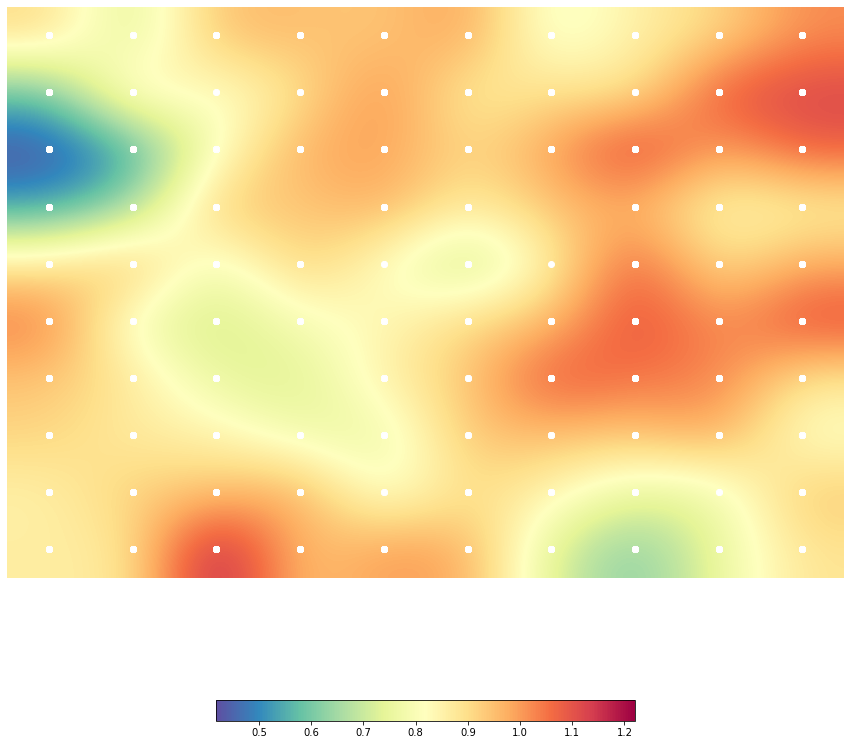

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

In [104]:
som.view_umatrix(bestmatches=True, colorbar=True, figsize=(15, 15))

## Clusters = 10

CPU times: user 530 ms, sys: 359 ms, total: 889 ms
Wall time: 468 ms


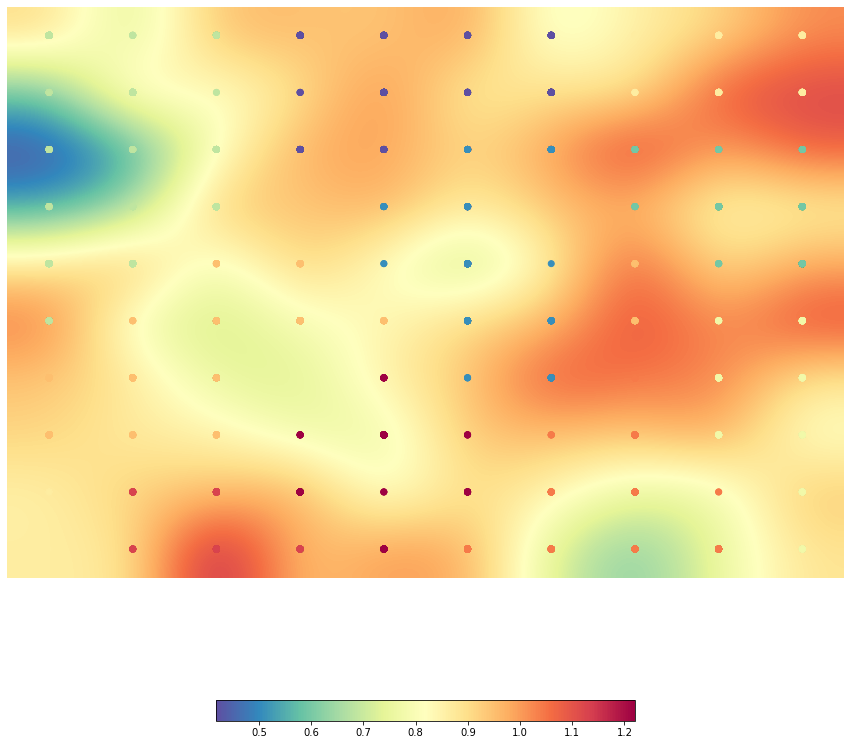

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

In [105]:
from sklearn.cluster import KMeans
alg = KMeans(n_clusters=10)
%time som.cluster(algorithm=alg)
som.view_umatrix(bestmatches=True, colorbar=True, figsize=(15, 15))

In [106]:
print(som.clusters)

[[3 3 3 0 0 0 0 5 5 5]
 [3 3 3 0 0 0 0 5 5 5]
 [3 3 3 0 0 1 1 2 2 2]
 [3 3 3 3 1 1 1 2 2 2]
 [3 3 6 6 1 1 1 6 2 2]
 [3 6 6 6 6 1 1 6 4 4]
 [6 6 6 6 9 1 1 7 4 4]
 [6 6 6 9 9 9 7 7 4 4]
 [5 8 8 9 9 9 7 7 7 4]
 [5 8 8 8 9 7 7 7 7 4]]


In [107]:
bmus = som.bmus
ubmus, indices = np.unique(bmus, return_inverse=True, axis=0)
print(ubmus.shape)

(97, 2)


In [108]:
clusters = som.clusters
uclusters ,counts = np.unique(clusters , return_counts=True)
sorted_counts = np.argsort(counts)
uclusters = uclusters[sorted_counts][::-1]
counts = counts[sorted_counts][::-1]
uclustersDict = dict(zip(uclusters,counts))
print('(cluster, neurons) pairs : ')
print(uclustersDict)

(cluster, neurons) pairs : 
{3: 16, 6: 15, 1: 12, 7: 10, 0: 10, 9: 8, 5: 8, 4: 8, 2: 8, 8: 5}


Από το παραπάνω λεξικό φαίνεται ότι οι πιο πολλοί νευρώνες μπήκαν στα clusters 3,6,1,7. Βάσει του Umatrix και του πίνακα som.clusters περιμένουμε το 3 και το 6 να είναι σημασιολογικά κοντά. Επίσης, τα 1 και 7 είναι μακρινά μεταξύ τους (σημασιολογικά0 και μακρινά από τα clusters 3, 6.

In [109]:
neurons_movies_report(print_cluster_neurons_movies_report(3))

[('Drama', 911), ('Comedy', 458), ('Romance Film', 239), ('Romantic drama', 197), ('World cinema', 127), ('Indie', 116), ('Comedy film', 76), ('Thriller', 75), ('Period piece', 73), ('Horror', 72), ('Black-and-white', 67), ('Crime Fiction', 60), ('Musical', 56), ('Comedy-drama', 51), ('Parody', 47), ('Film adaptation', 47), ('Silent film', 45), ('Romantic comedy', 40), ('Sports', 34), ('Biographical film', 33), ('Adventure', 33), ('Teen', 32), ('Melodrama', 31), ('Coming of age', 31), ('Biography', 30), ('Family Film', 30), ('Black comedy', 29), ('Television movie', 29), ('Satire', 28), ('Bollywood', 27), ('Mystery', 26), ('Biopic [feature]', 26), ('War film', 26), ('Psychological thriller', 26), ('Cult', 25), ('Action', 25), ('Slapstick', 24), ('Slasher', 21), ('Fantasy', 21), ('Chinese Movies', 20), ('Political drama', 18), ('Family Drama', 17), ('Buddy film', 17), ('Supernatural', 17), ('Science Fiction', 16), ('Japanese Movies', 14), ('Road movie', 13), ('Ensemble Film', 13), ('Cos

In [110]:
neurons_movies_report(print_cluster_neurons_movies_report(1))

[('Documentary', 118), ('Drama', 58), ('World cinema', 58), ('Action/Adventure', 53), ('Short Film', 48), ('Action', 47), ('Thriller', 44), ('Family Film', 42), ('Animation', 38), ('Comedy', 26), ('Comedy film', 25), ('Adventure', 25), ('Black-and-white', 23), ('Science Fiction', 22), ('Musical', 19), ('Crime Fiction', 19), ('Mystery', 18), ('Bollywood', 18), ('Romance Film', 18), ('Indie', 17), ('Crime Thriller', 17), ('History', 16), ('Horror', 15), ('Culture & Society', 14), ('War film', 14), ('Psychological thriller', 12), ('Music', 12), ('Biography', 11), ('Japanese Movies', 11), ('Slapstick', 11), ('Fantasy', 10), ('Martial Arts Film', 9), ('Political cinema', 8), ('Chinese Movies', 8), ('Sports', 8), ('Parody', 7), ('Film adaptation', 7), ('Social issues', 6), ('Supernatural', 6), ('Suspense', 6), ('Western', 6), ('Period piece', 5), ('Political drama', 5), ('Epic', 5), ('Historical fiction', 4), ('Erotic thriller', 4), ('Comedy-drama', 4), ('Satire', 4), ('Screwball comedy', 3)

In [111]:
neurons_movies_report(print_cluster_neurons_movies_report(6))

[('Drama', 375), ('World cinema', 173), ('Adventure', 158), ('Family Film', 152), ('Black-and-white', 133), ('Comedy', 123), ('Animation', 98), ('Short Film', 70), ('Thriller', 68), ('Musical', 64), ('Fantasy', 64), ('Action/Adventure', 54), ("Children\\'s/Family", 50), ('Bollywood', 47), ('Silent film', 42), ('Western', 41), ('Science Fiction', 38), ('Indie', 36), ('Crime Fiction', 31), ('Comedy film', 31), ('Horror', 27), ("Children\\'s Fantasy", 25), ("Children\\'s", 25), ('Action', 22), ('Art film', 19), ('Family-Oriented Adventure', 18), ('Chinese Movies', 18), ('Film adaptation', 18), ('Political drama', 17), ('Mystery', 17), ('Psychological thriller', 16), ('Romance Film', 16), ('Family Drama', 15), ('Computer Animation', 14), ('Film noir', 13), ('Costume drama', 13), ('Japanese Movies', 10), ('Period piece', 10), ('Comedy-drama', 9), ('Supernatural', 9), ('Television movie', 9), ('Music', 8), ('Animal Picture', 8), ('Sports', 8), ('War film', 8), ('Fantasy Adventure', 8), ('Mel

In [112]:
neurons_movies_report(print_cluster_neurons_movies_report(7))

[('Action', 330), ('Comedy', 150), ('Romance Film', 143), ('Thriller', 137), ('Action/Adventure', 117), ('Adventure', 106), ('Drama', 76), ('Animation', 59), ('Science Fiction', 59), ('Short Film', 59), ('Chinese Movies', 58), ('Crime Fiction', 54), ('Horror', 51), ('World cinema', 47), ('Japanese Movies', 46), ('Musical', 45), ('Mystery', 45), ('Martial Arts Film', 44), ('Western', 42), ('Crime Thriller', 41), ('Comedy film', 40), ('War film', 34), ('Black-and-white', 27), ('Fantasy', 26), ('Romantic comedy', 25), ('Suspense', 23), ('Comedy-drama', 20), ('Spy', 19), ('Psychological thriller', 16), ('Indie', 15), ('Black comedy', 14), ('Action Thrillers', 13), ('Cult', 12), ('Anime', 12), ('Parody', 11), ('Film adaptation', 10), ('Wuxia', 10), ('Disaster', 10), ('Detective fiction', 9), ('Detective', 9), ('Sports', 9), ('Historical fiction', 8), ('Action Comedy', 8), ('Bollywood', 8), ('Film noir', 8), ('Filipino Movies', 8), ('Television movie', 8), ('History', 7), ('Horror Comedy', 7

Παρατηρούμε ότι προβλέψεις μας επαληθεύονται. Παρατηρούμε επίσης ότι εντός ενός cluster υπάρχουν ταινίες διαφορετικών ειδών, κάτι το οποίο δεν είναι καλό, αλλά η κερίαρχη κατηγορία σε κάθε report διαφέρει σημαντικά σε αριθμό από τις επόμενες (τουλάχιστον διαπλάσιο), κάτι το οποίο είναι ικανοποιητικό.

## Clusters = 20

CPU times: user 856 ms, sys: 589 ms, total: 1.45 s
Wall time: 765 ms


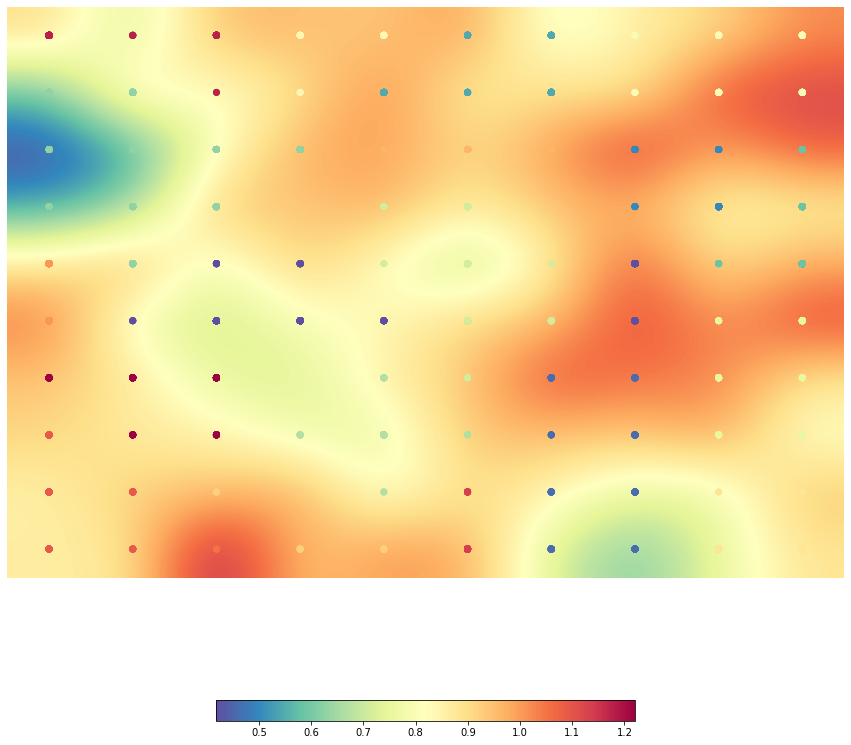

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

In [113]:
alg = KMeans(n_clusters=20)
%time som.cluster(algorithm=alg)
som.view_umatrix(bestmatches=True, colorbar=True, figsize=(15, 15))

In [114]:
bmus = som.bmus
ubmus, indices = np.unique(bmus, return_inverse=True, axis=0)
print(ubmus.shape)

(97, 2)


In [115]:
clusters = som.clusters
uclusters ,counts = np.unique(clusters , return_counts=True)
sorted_counts = np.argsort(counts)
uclusters = uclusters[sorted_counts][::-1]
counts = counts[sorted_counts][::-1]
uclustersDict = dict(zip(uclusters,counts))
print('(cluster, neurons) pairs : ')
print(uclustersDict)

(cluster, neurons) pairs : 
{5: 11, 0: 9, 7: 9, 1: 8, 8: 6, 9: 6, 6: 5, 16: 5, 3: 5, 19: 5, 12: 4, 11: 4, 18: 4, 4: 4, 2: 4, 13: 3, 10: 3, 14: 2, 17: 2, 15: 1}


In [116]:
print(som.clusters)

[[18 18 18 10 10  3  3  9  9  9]
 [ 5  5 18 10  3  3  3  9  9  9]
 [ 5  5  5  5 13 13 13  2  2  4]
 [ 5  5  5  5  7  7  7  2  2  4]
 [14  5  0  0  7  7  7  0  4  4]
 [14  0  0  0  0  7  7  0  8  8]
 [19 19 19  0  6  7  1  1  8  8]
 [16 19 19  6  6  6  1  1  8  8]
 [16 16 12 12  6 17  1  1 11 11]
 [16 16 15 12 12 17  1  1 11 11]]


Εδώ, οι πιο πολλοί νευρώνες περιέχονται στα clusters 5, 0, 7 και 1. Από αυτά και με βάση το umatrix και τον πίνακα som.clusters τα 5 και 7 είναι  απομακρυσμένα, τα 5 και 0 είναι αρκετά κοντά και το 1 είναι μακρία από όλα.   

In [117]:
neurons_movies_report(print_cluster_neurons_movies_report(5))

[('Drama', 775), ('Comedy', 450), ('Romance Film', 139), ('Indie', 69), ('Horror', 66), ('Thriller', 65), ('Crime Fiction', 50), ('Parody', 47), ('Comedy-drama', 46), ('Romantic comedy', 37), ('Period piece', 37), ('Musical', 33), ('Sports', 31), ('Teen', 30), ('Black comedy', 29), ('Biographical film', 28), ('Family Film', 28), ('Coming of age', 27), ('Satire', 26), ('Cult', 26), ('Biography', 25), ('Television movie', 25), ('Psychological thriller', 25), ('World cinema', 24), ('Adventure', 24), ('Black-and-white', 24), ('Film adaptation', 24), ('Slapstick', 23), ('Biopic [feature]', 22), ('Slasher', 21), ('Melodrama', 21), ('Mystery', 20), ('Action', 20), ('Buddy film', 17), ('Supernatural', 17), ('Political drama', 17), ('Fantasy', 16), ('War film', 14), ('Japanese Movies', 13), ('Historical fiction', 13), ('Chinese Movies', 12), ('Family Drama', 12), ('Sex comedy', 11), ('Comedy of manners', 11), ('Science Fiction', 10), ('Ensemble Film', 10), ('Road movie', 10), ('Political cinema

In [118]:
neurons_movies_report(print_cluster_neurons_movies_report(7))

[('Documentary', 105), ('World cinema', 53), ('Action/Adventure', 52), ('Action', 43), ('Drama', 42), ('Family Film', 39), ('Animation', 38), ('Short Film', 34), ('Comedy film', 25), ('Adventure', 20), ('Musical', 17), ('History', 16), ('Bollywood', 16), ('Culture & Society', 14), ('War film', 12), ('Crime Fiction', 12), ('Biography', 11), ('Music', 11), ('Japanese Movies', 11), ('Indie', 11), ('Science Fiction', 10), ('Martial Arts Film', 9), ('Chinese Movies', 8), ('Sports', 8), ('Political cinema', 7), ('Black-and-white', 7), ('Comedy', 7), ('Social issues', 6), ('Fantasy', 6), ('Western', 6), ('Thriller', 5), ('Epic', 5), ('Period piece', 4), ('Historical fiction', 4), ('Crime Thriller', 4), ('Film adaptation', 4), ('Costume drama', 3), ('Political drama', 3), ('Rockumentary', 3), ('Biographical film', 3), ('Dance', 2), ('Costume Adventure', 2), ('Cult', 2), ('Comedy-drama', 2), ('Combat Films', 2), ('Biopic [feature]', 2), ('Doomsday film', 2), ('Wuxia', 2), ('News', 2), ('Travel'

In [119]:
neurons_movies_report(print_cluster_neurons_movies_report(0))

[('Drama', 229), ('World cinema', 171), ('Family Film', 141), ('Comedy', 115), ('Adventure', 98), ('Animation', 96), ('Black-and-white', 73), ('Thriller', 68), ('Fantasy', 60), ('Musical', 59), ('Short Film', 59), ('Bollywood', 46), ("Children\\'s/Family", 45), ('Indie', 34), ('Silent film', 31), ('Crime Fiction', 31), ('Horror', 27), ("Children\\'s Fantasy", 25), ("Children\\'s", 25), ('Science Fiction', 22), ('Art film', 19), ('Political drama', 16), ('Action/Adventure', 16), ('Mystery', 16), ('Psychological thriller', 15), ('Romance Film', 15), ('Computer Animation', 14), ('Family-Oriented Adventure', 14), ('Family Drama', 12), ('Chinese Movies', 11), ('Film adaptation', 10), ('Japanese Movies', 9), ('Supernatural', 9), ('Period piece', 9), ('Music', 8), ('Comedy-drama', 8), ('Action', 8), ('Political thriller', 7), ('Western', 7), ('Film noir', 7), ('Fantasy Adventure', 7), ('Documentary', 6), ('Coming of age', 6), ('Animated Musical', 5), ('Childhood Drama', 5), ('Animated cartoon

In [120]:
neurons_movies_report(print_cluster_neurons_movies_report(1))

[('Action', 242), ('Comedy', 164), ('Romance Film', 142), ('Action/Adventure', 90), ('Adventure', 86), ('Short Film', 65), ('Chinese Movies', 57), ('Animation', 53), ('Thriller', 49), ('Crime Fiction', 49), ('Musical', 45), ('Mystery', 43), ('Martial Arts Film', 41), ('Science Fiction', 41), ('Western', 40), ('Japanese Movies', 39), ('Horror', 38), ('Comedy film', 37), ('World cinema', 37), ('Black-and-white', 37), ('Crime Thriller', 36), ('Drama', 28), ('Romantic comedy', 25), ('War film', 24), ('Comedy-drama', 22), ('Fantasy', 19), ('Parody', 18), ('Suspense', 18), ('Documentary', 15), ('Slapstick', 15), ('Psychological thriller', 14), ('Black comedy', 13), ('Cult', 13), ('Spy', 11), ('Wuxia', 10), ('Indie', 10), ('Satire', 10), ('Sports', 9), ('Detective fiction', 9), ('Detective', 9), ('Action Comedy', 8), ('Bollywood', 8), ('Historical fiction', 8), ('Filipino Movies', 8), ('Horror Comedy', 7), ('Television movie', 7), ('Film noir', 7), ('Film adaptation', 7), ('Screwball comedy',

Παρατηρούμε ότι όντως επαληθεύονται οι προβλέψεις που έγιναν παραπάνω, στα clusters 5 και 0 επικρατεί η ίδια κατηγορία (drama) ενώ στα υπόλοιπα clusters (1 και 7) κυριαρχούν οι κατηγορίες Action και Documentary, που είναι μερικώς απομακρισμένες τόσο μεταξύ τους όσο και με τα 5, 0. Και εδώ, ένα cluster περιέχει ταινίες διαφορετικών ειδών, δηλάδή σε μια κλάση υπάρχουν ταινίες της κατηγορίας Drama αλλά και της κατηγορίας Comedy. Αυτό δεν είναι απαγορευτικό, αλλά όταν ο αριθμός των ταινιών της πρώτης κατηγορίας είναι σημαντικά μεγαλύτερος από αυτόν της δεύτερης θεωρούμε ότι η πρώτη κλάση κυριαρχεί και είναι η αντιπροσωπευτική του cluster.

## Clusters = 30

CPU times: user 1.14 s, sys: 735 ms, total: 1.88 s
Wall time: 968 ms


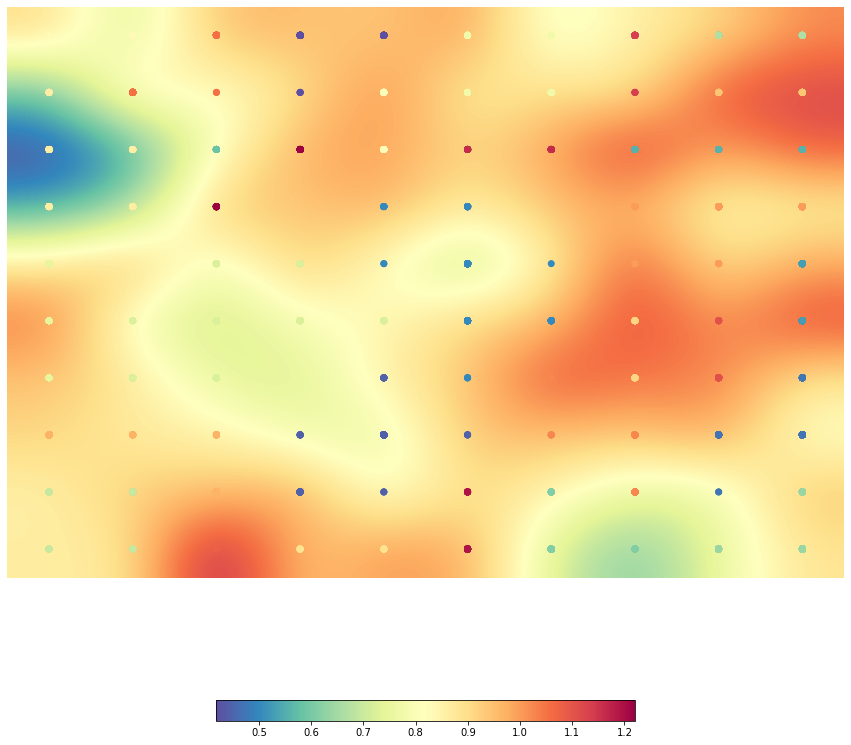

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

In [122]:
alg = KMeans(n_clusters=30)
%time som.cluster(algorithm=alg)
som.view_umatrix(bestmatches=True, colorbar=True, figsize=(15, 15))

In [123]:
print(som.clusters)

[[15 15 23  0  0 13 13 26  9  9]
 [16 23 23  0 14 13 13 26 19 19]
 [16 16  6 29 14 27 27  5  5  5]
 [16 16 29 29  3  3  3 21 21 21]
 [12 16 11 11  3  3  3 21 21  4]
 [12 11 11 11 11  3  3 18 25  4]
 [12 11 11 11  1  3 22 18 25  2]
 [20 20 20  1  1  1 22 22  2  2]
 [10 10 20  1  1 28  7 22  2  8]
 [10 10 24 17 17 28  7  7  8  8]]


In [124]:
bmus = som.bmus
ubmus, indices = np.unique(bmus, return_inverse=True, axis=0)
print(ubmus.shape)

(97, 2)


In [125]:
clusters = som.clusters
uclusters ,counts = np.unique(clusters , return_counts=True)
sorted_counts = np.argsort(counts)
uclusters = uclusters[sorted_counts][::-1]
counts = counts[sorted_counts][::-1]
uclustersDict = dict(zip(uclusters,counts))
print('(cluster, neurons) pairs : ')
print(uclustersDict)

(cluster, neurons) pairs : 
{3: 9, 11: 9, 1: 6, 16: 6, 21: 5, 13: 4, 2: 4, 22: 4, 20: 4, 10: 4, 29: 3, 5: 3, 7: 3, 8: 3, 12: 3, 0: 3, 23: 3, 28: 2, 15: 2, 17: 2, 18: 2, 9: 2, 19: 2, 4: 2, 25: 2, 26: 2, 27: 2, 14: 2, 6: 1, 24: 1}


Για τα μεγαλύτερα clusters (3, 11, 1, 16). Βάσει του umatrix και του πίνακα clusters μπορούμε να πούμε με σιγουριά ότι τα clusters 11 και 16 είναι πολύ κοντά σημασιολογικά. 

In [126]:
neurons_movies_report(print_cluster_neurons_movies_report(3))

[('Documentary', 105), ('World cinema', 53), ('Action/Adventure', 52), ('Action', 43), ('Drama', 42), ('Family Film', 39), ('Animation', 38), ('Short Film', 34), ('Comedy film', 25), ('Adventure', 20), ('Musical', 17), ('History', 16), ('Bollywood', 16), ('Culture & Society', 14), ('War film', 12), ('Crime Fiction', 12), ('Biography', 11), ('Music', 11), ('Japanese Movies', 11), ('Indie', 11), ('Science Fiction', 10), ('Martial Arts Film', 9), ('Chinese Movies', 8), ('Sports', 8), ('Political cinema', 7), ('Black-and-white', 7), ('Comedy', 7), ('Social issues', 6), ('Fantasy', 6), ('Western', 6), ('Thriller', 5), ('Epic', 5), ('Period piece', 4), ('Historical fiction', 4), ('Crime Thriller', 4), ('Film adaptation', 4), ('Costume drama', 3), ('Political drama', 3), ('Rockumentary', 3), ('Biographical film', 3), ('Dance', 2), ('Costume Adventure', 2), ('Cult', 2), ('Comedy-drama', 2), ('Combat Films', 2), ('Biopic [feature]', 2), ('Doomsday film', 2), ('Wuxia', 2), ('News', 2), ('Travel'

In [127]:
neurons_movies_report(print_cluster_neurons_movies_report(11))

[('Drama', 313), ('World cinema', 165), ('Black-and-white', 132), ('Adventure', 130), ('Family Film', 99), ('Comedy', 62), ('Musical', 60), ('Fantasy', 58), ("Children\\'s/Family", 47), ('Action/Adventure', 47), ('Bollywood', 46), ('Animation', 42), ('Silent film', 41), ('Western', 40), ('Indie', 34), ('Science Fiction', 33), ('Crime Fiction', 31), ('Thriller', 30), ('Comedy film', 28), ('Horror', 25), ("Children\\'s", 25), ("Children\\'s Fantasy", 25), ('Short Film', 20), ('Art film', 18), ('Mystery', 17), ('Psychological thriller', 16), ('Film adaptation', 15), ('Family-Oriented Adventure', 15), ('Romance Film', 14), ('Family Drama', 14), ('Computer Animation', 13), ('Film noir', 13), ('Political drama', 12), ('Chinese Movies', 12), ('Costume drama', 11), ('Action', 10), ('Comedy-drama', 9), ('Japanese Movies', 9), ('Music', 8), ('Period piece', 8), ('Supernatural', 8), ('Television movie', 7), ('Melodrama', 7), ('Fantasy Adventure', 7), ('Coming of age', 6), ('Childhood Drama', 6), 

In [128]:
neurons_movies_report(print_cluster_neurons_movies_report(1))

[('War film', 14), ('Indie', 5), ('Black-and-white', 2), ('Spy', 1), ('Romantic drama', 1), ('Culture & Society', 1), ('Combat Films', 1), ('Chinese Movies', 1)]


In [129]:
neurons_movies_report(print_cluster_neurons_movies_report(16))

[('Drama', 640), ('Comedy', 410), ('Thriller', 65), ('Horror', 62), ('Indie', 54), ('Parody', 45), ('Comedy-drama', 40), ('Crime Fiction', 40), ('Period piece', 32), ('Sports', 29), ('Black comedy', 28), ('Biographical film', 27), ('Teen', 26), ('Television movie', 25), ('Satire', 25), ('Psychological thriller', 25), ('Biography', 24), ('Cult', 24), ('Musical', 23), ('World cinema', 23), ('Biopic [feature]', 21), ('Slapstick', 21), ('Family Film', 21), ('Mystery', 20), ('Slasher', 20), ('Action', 20), ('Adventure', 20), ('Film adaptation', 20), ('Melodrama', 18), ('Supernatural', 17), ('Coming of age', 17), ('Buddy film', 16), ('Political drama', 15), ('Fantasy', 13), ('Japanese Movies', 13), ('Black-and-white', 12), ('Chinese Movies', 12), ('Science Fiction', 10), ('Historical fiction', 10), ('Mockumentary', 9), ('Political cinema', 9), ('Crime Comedy', 9), ('Road movie', 9), ('Ensemble Film', 9), ('Family Drama', 9), ('Docudrama', 8), ('Romantic drama', 8), ('Americana', 8), ('War fi

In [131]:
neurons_movies_report(print_cluster_neurons_movies_report(13))

[('Horror', 56), ('Slasher', 52), ('Cult', 25), ('B-movie', 11), ('Teen', 10), ('Supernatural', 10), ('Psychological thriller', 7), ('Indie', 6), ('World cinema', 4), ('Mystery', 4), ('Zombie Film', 3), ('Monster movie', 3), ('Road-Horror', 3), ('Splatter film', 3), ('Thriller', 3), ('Horror Comedy', 2), ('Black comedy', 2), ('Natural horror films', 1), ('Remake', 1), ('Japanese Movies', 1), ('Short Film', 1), ('Erotic thriller', 1), ('Doomsday film', 1), ('Television movie', 1), ('Crime Fiction', 1), ('Creature Film', 1), ('Black-and-white', 1), ('Albino bias', 1)]


Σε αυτή την περίτωση αξίζει να πούμε ότι ο διαχωρισμός πέτυχε πολύ καλά στην περίπτωση του cluster 13. Εκεί, οι δύο πρώτες κατηγορίες είχαν περίπου περίπου ίδιο αριθμό εμφανίσεων και άρα δεν μπορούσαμε να θεωρήσουμε την πρώτη ως αντιπροσωπευτική. Ωστόσο, οι δύο αυτές πρώτες κατηγορίες είναι μεταξύ τους παρόμοιες (horror και slasher).

# Grid Size = 20


In [225]:
som = run_som_grid_clusters(20, finalSet, 'som20grid.pkl')
#som = joblib.load('som20grid.pkl')

## Clusters = 15

CPU times: user 2.89 s, sys: 2.01 s, total: 4.9 s
Wall time: 2.5 s


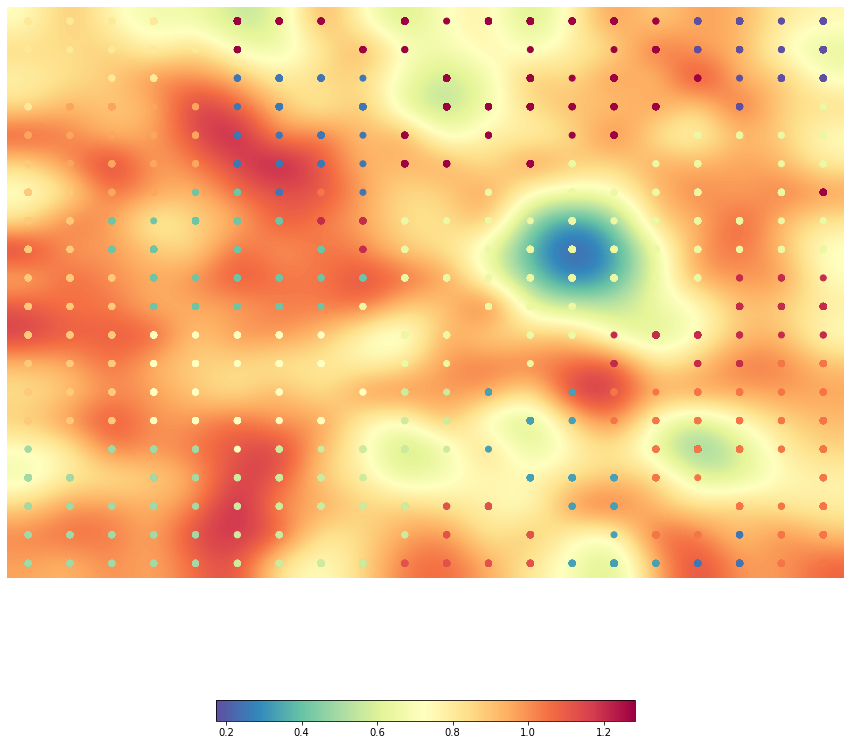

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

In [133]:
from sklearn.cluster import KMeans
alg = KMeans(n_clusters=15)
%time som.cluster(algorithm=alg)
som.view_umatrix(bestmatches=True, colorbar=True, figsize=(15, 15))

In [134]:
print(som.clusters)

[[ 8  8  8  8 14 14 14 14 14 14 14 14 14 14 14 14  0  0  0  0]
 [ 8  8  8  8  8 14  1  1 14 14 14 14 14 14 14 14  0  0  0  0]
 [ 8  8  8  8  8  1  1  1  1 14 14 14 14 14 14 14 14  0  0  0]
 [ 8 10 10 10 10  1  1  1  1 14 14 14 14 14 14 14  6  0  0  6]
 [10 10 10 10 10  1  1  1  1 14 14 14 14 14 14  6  6  6  6  6]
 [ 9 10 10 10 10  1  1  1  1 14 14 14 14  6 14  6  6  6  6  6]
 [ 9  9 10 10  3  3  1 11  1  6  6  6  6  6  6  6  6  6  6 14]
 [ 9  9  3  3  3  3  3 13 13  6  6  6  6  6  6  6  6  6  6  6]
 [ 9  9  3  3  3  3  3  3 13  6  6  6  6  6  6  6  6  6  6  6]
 [ 9  9  9  3  3  3  3  3  3  6  6  6  6  6  6  6  6 13 13 13]
 [ 9  9  9  3  3  3  3  3  6  6  6  6  6  6  6 13 13 13 13 13]
 [ 9  9  9  7  7  7  7  7  6  6  6  6  6  6 13 13 13 13 13 13]
 [ 9  9  9  7  7  7  7  7  7  6  6  2  6  6 13 13 13 13 11 11]
 [ 9  9  9  7  7  7  7  7  7  5  5  2  2  2 11 11 11 11 11 11]
 [ 9  9  9  7  7  7  7  7  5  5  5  2  2  2 11 11 11 11 11 11]
 [ 4  4  4  4  4  7  5  5  5  5  5  2  2  2 11 11 11 11

In [136]:
bmus = som.bmus
ubmus, indices = np.unique(bmus, return_inverse=True, axis=0)
print(ubmus.shape)

(338, 2)


In [135]:
clusters = som.clusters
uclusters ,counts = np.unique(clusters , return_counts=True)
sorted_counts = np.argsort(counts , )
uclusters = uclusters[sorted_counts][::-1]
counts = counts[sorted_counts][::-1]
uclustersDict = dict(zip(uclusters,counts))
print('(cluster, neurons) pairs : ')
print(uclustersDict)

(cluster, neurons) pairs : 
{6: 70, 14: 48, 11: 37, 5: 30, 9: 25, 4: 25, 3: 24, 7: 23, 1: 23, 2: 22, 13: 21, 10: 15, 8: 15, 0: 13, 12: 9}


Από τα παραπάνω Clusters, θα εξετάσουμε τα 11, 9 και 7, τα οποία βάσει των πινάκων umatrix και clusters είναι απομακρυσμένα μεταξύ τους.





In [139]:
neurons_movies_report(print_cluster_neurons_movies_report(11))

[('Drama', 410), ('Black-and-white', 134), ('Comedy', 127), ('Action', 126), ('Romance Film', 125), ('Family Film', 104), ('World cinema', 95), ('Adventure', 93), ('Action/Adventure', 88), ('Animation', 63), ('Thriller', 57), ('Science Fiction', 51), ('Crime Fiction', 48), ('Musical', 41), ('Silent film', 40), ('Western', 39), ('Short Film', 38), ('Fantasy', 34), ('Comedy film', 28), ('Indie', 26), ('Black comedy', 23), ('Romantic comedy', 22), ('War film', 20), ('Comedy-drama', 18), ('Horror', 16), ('Film noir', 16), ('Melodrama', 14), ('Political drama', 13), ('Film adaptation', 13), ('Biopic [feature]', 12), ('Biography', 12), ('Family Drama', 11), ('Sports', 10), ('Mystery', 10), ('Japanese Movies', 10), ('Television movie', 9), ('Docudrama', 8), ('Crime Thriller', 8), ('Cult', 8), ('Period piece', 8), ('Superhero movie', 8), ('Costume drama', 7), ('Buddy film', 7), ('Crime Drama', 7), ('Political thriller', 7), ('History', 7), ('Screwball comedy', 6), ('Coming of age', 6), ('Gangs

In [141]:
neurons_movies_report(print_cluster_neurons_movies_report(9))

[('Thriller', 110), ('Drama', 108), ('Comedy film', 91), ('World cinema', 48), ('Mystery', 47), ('Indie', 42), ('Horror', 41), ('Romantic drama', 40), ('Romance Film', 36), ('Chinese Movies', 33), ('Psychological thriller', 28), ('Crime Fiction', 28), ('Crime Thriller', 26), ('Comedy', 26), ('Slasher', 23), ('Comedy-drama', 22), ('Suspense', 20), ('War film', 20), ('Adventure', 18), ('Science Fiction', 16), ('Cult', 15), ('Black comedy', 14), ('Action/Adventure', 13), ('Period piece', 12), ('B-movie', 12), ('Martial Arts Film', 10), ('Family Film', 10), ('Romantic comedy', 10), ('Action', 9), ('Black-and-white', 9), ('Historical fiction', 8), ('Film adaptation', 8), ('Fantasy', 7), ('Teen', 7), ('Filipino Movies', 7), ('Marriage Drama', 6), ('Art film', 6), ('Biographical film', 6), ('Musical', 6), ('Japanese Movies', 6), ('Political thriller', 5), ('Gangster Film', 5), ('Erotic thriller', 5), ('Satire', 5), ('Supernatural', 5), ('Bollywood', 5), ('Melodrama', 5), ('Monster movie', 5),

In [144]:
neurons_movies_report(print_cluster_neurons_movies_report(7))

[('Comedy', 126), ('Romance Film', 80), ('Romantic comedy', 75), ('Action/Adventure', 29), ('Drama', 28), ('Action', 26), ('Indie', 23), ('Parody', 18), ('Crime Fiction', 17), ('Musical', 16), ('War film', 15), ('Period piece', 12), ('Mystery', 10), ('Satire', 10), ('Screwball comedy', 10), ('Black-and-white', 9), ('Slapstick', 7), ('Sex comedy', 6), ('Sports', 6), ('Comedy of Errors', 6), ('Romantic drama', 5), ('Action Comedy', 5), ('Television movie', 5), ('Science Fiction', 4), ('Political drama', 4), ('Spy', 4), ('Thriller', 4), ('Workplace Comedy', 4), ('Film adaptation', 4), ('Mockumentary', 3), ('History', 3), ('Black comedy', 3), ('Comedy of manners', 3), ('Family Film', 2), ('Ensemble Film', 2), ('Film noir', 2), ('Buddy film', 2), ('Cult', 2), ('Domestic Comedy', 2), ('World cinema', 2), ('Remake', 2), ('Horror', 2), ('Western', 2), ('Melodrama', 2), ('Music', 2), ('Musical comedy', 2), ('Auto racing', 2), ('Teen', 2), ('Road movie', 2), ('Biopic [feature]', 1), ('Courtroom 

Πράγματι, τα 11 και 7 είναι μεταξύ τους πολύ μακρινά (drama και comedy) ενώ το 9 είναι απομακρυσμένο αλλά πιο κοντά στο 11 από ότι στο 7

## Clusters = 20 

CPU times: user 3.4 s, sys: 2.3 s, total: 5.7 s
Wall time: 2.89 s


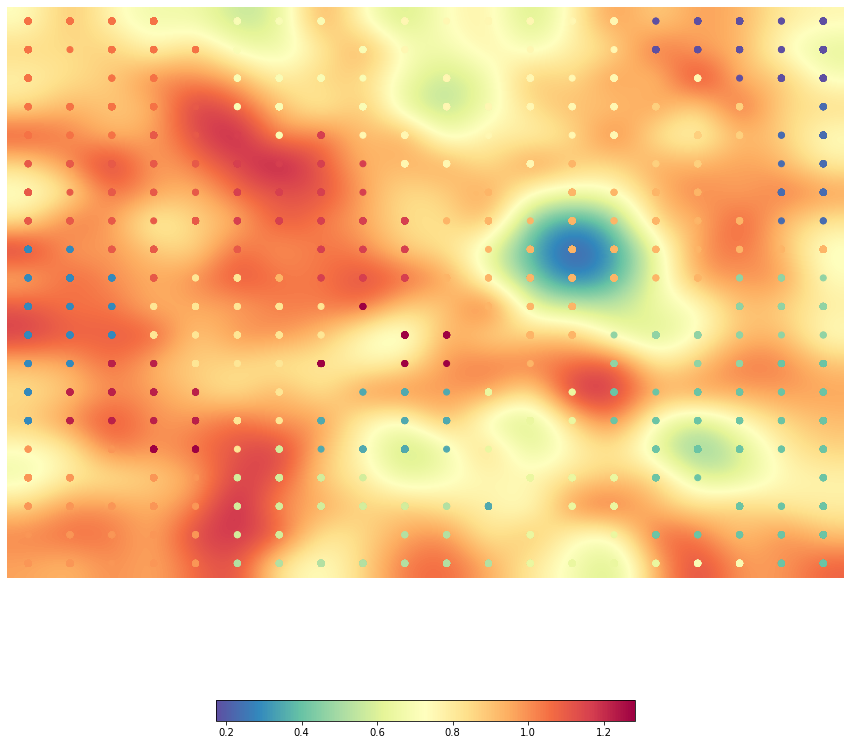

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

In [145]:
from sklearn.cluster import KMeans
alg = KMeans(n_clusters=20)
%time som.cluster(algorithm=alg)
som.view_umatrix(bestmatches=True, colorbar=True, figsize=(15, 15))

In [60]:
print(som.clusters)

[[19 19 19 19  1  1  1  1  1  1  1  1  1  1  1  1  7  7  7  7]
 [19 19 19 19 19  1 15 15 15  1  1  1  1  1  1  7  7  7  7  7]
 [19 19 19 19 19 15 15 15 15  1  1  1  1  1  1  1  1  7  7  7]
 [19 10 10 10 10 15 15 15  1  1  1  1  1  1  1  1  6  7  7  7]
 [10 10 10 10 10 12 15 12  1  1  1  1  1  1  1  6  6  6  6  6]
 [13 10 10 10 16 12 12 12 12  1  1  1  1  6  1  6  6  6  0  0]
 [13 13 10 10 16 12 12 12 12  6  6  6  6  6  6  6  6  0  0  0]
 [13 13 13 16 16 16 12 12  8  6  6  6  6  6  6  6  6  6  0  0]
 [13 13 13 16 16 16 16 16  8  6  6  6  6  6  6  6  6  6  0  0]
 [13 13 13  2  2  2 16 16 16  6  6  6  6  6  6  6  6  8  0  0]
 [13 13  2  2  2  2  2 16  6  6  6  6  6  6  6  8  8  8  8  8]
 [13 18 18  2  2  3  3  3  6  6  6  6  6  6  8  8  8  8  8  8]
 [18 18 18 18  3  3  3  3  3  6  6 11  6  6  8  8  8  8 14 14]
 [18 18 18 18 18  3  3  3 11 11 11 11 11 16 16 14 14 14 14 14]
 [18 18 18 18  3  3  3 11 11 11 11 11 11 11 14 14 14 14 14 14]
 [ 5  5  5  5  5  3  9  9 11 11 11 11 11  4 14 14 14 14

In [146]:
clusters = som.clusters
uclusters ,counts = np.unique(clusters , return_counts=True)
sorted_counts = np.argsort(counts , )
uclusters = uclusters[sorted_counts][::-1]
counts = counts[sorted_counts][::-1]
uclustersDict = dict(zip(uclusters,counts))
print('(cluster, neurons) pairs : ')
print(uclustersDict)

(cluster, neurons) pairs : 
{13: 44, 10: 40, 4: 37, 17: 23, 16: 23, 14: 23, 8: 23, 15: 21, 11: 21, 9: 18, 5: 18, 2: 15, 3: 15, 0: 14, 7: 13, 6: 12, 19: 11, 18: 10, 1: 10, 12: 9}


In [147]:
bmus = som.bmus
ubmus, indices = np.unique(bmus, return_inverse=True, axis=0)
print(ubmus.shape)

(338, 2)


Για την περίπτωση αυτή δοκιμάζουμε τις κλάσεις 4, 0, 7, 18 που βρίσκονται όλες μακριά η μια από την άλλη σύμφωνα με τον πίνακα cluster και umatrix.

In [150]:
neurons_movies_report(print_cluster_neurons_movies_report(4))

[('Drama', 406), ('Black-and-white', 134), ('Comedy', 126), ('Romance Film', 125), ('Action', 121), ('Family Film', 104), ('World cinema', 95), ('Adventure', 90), ('Action/Adventure', 86), ('Animation', 62), ('Thriller', 57), ('Crime Fiction', 48), ('Science Fiction', 45), ('Musical', 41), ('Western', 39), ('Silent film', 39), ('Short Film', 37), ('Fantasy', 34), ('Comedy film', 28), ('Indie', 25), ('Romantic comedy', 22), ('Black comedy', 22), ('War film', 20), ('Comedy-drama', 18), ('Film noir', 15), ('Melodrama', 14), ('Political drama', 13), ('Biography', 12), ('Biopic [feature]', 12), ('Family Drama', 11), ('Mystery', 10), ('Japanese Movies', 10), ('Horror', 10), ('Film adaptation', 10), ('Sports', 10), ('Television movie', 9), ('Docudrama', 8), ('Period piece', 8), ('Crime Thriller', 8), ('Cult', 7), ('History', 7), ('Political thriller', 7), ('Buddy film', 7), ('Costume drama', 7), ('Crime Drama', 7), ('Superhero movie', 7), ('Screwball comedy', 6), ('Coming of age', 6), ('Heist

In [160]:
neurons_movies_report(print_cluster_neurons_movies_report(0))

[('Comedy', 92), ('Horror', 79), ('Drama', 50), ('Parody', 38), ('Comedy-drama', 26), ('Adventure', 24), ('Satire', 19), ('Black-and-white', 18), ('World cinema', 17), ('Teen', 13), ('Romance Film', 13), ('Action', 12), ('Action/Adventure', 10), ('Science Fiction', 10), ('Thriller', 9), ('Cult', 8), ('Musical', 8), ('Chinese Movies', 8), ('Indie', 7), ('Slapstick', 7), ('Crime Fiction', 6), ('Zombie Film', 6), ('Black comedy', 6), ('Romantic comedy', 5), ('Political satire', 5), ('Political cinema', 5), ('Adventure Comedy', 5), ('Horror Comedy', 4), ('Comedy of manners', 4), ('Sports', 4), ('Western', 4), ('Coming of age', 4), ('Musical comedy', 4), ('Mystery', 3), ('Mockumentary', 3), ('Comedy film', 3), ('Natural horror films', 3), ('Period piece', 3), ('Buddy film', 3), ('Biographical film', 3), ('Television movie', 3), ('War film', 3), ('Costume drama', 2), ('Creature Film', 2), ('Comedy of Errors', 2), ('Filipino Movies', 2), ('Christian film', 2), ('Domestic Comedy', 2), ('Childh

In [161]:
neurons_movies_report(print_cluster_neurons_movies_report(7))

[('Family Film', 19), ('Drama', 15), ('Science Fiction', 14), ('Horror', 14), ('War film', 13), ('Black-and-white', 13), ('Creature Film', 12), ('Romance Film', 6), ('Cult', 6), ('Adventure', 5), ('Fantasy', 5), ('Sci-Fi Horror', 4), ('Romantic drama', 4), ('Monster', 4), ('Thriller', 4), ('Western', 3), ('Comedy', 3), ('Costume drama', 3), ('Musical', 3), ('Film adaptation', 2), ('Combat Films', 2), ('Mystery', 2), ('Monster movie', 2), ('Natural horror films', 2), ('Period piece', 2), ('B-movie', 2), ('Suspense', 2), ('Action/Adventure', 2), ('Cavalry Film', 1), ('Black comedy', 1), ('Biopic [feature]', 1), ('Comedy Western', 1), ('Comedy-drama', 1), ('Animated cartoon', 1), ('Alien Film', 1), ('Costume Horror', 1), ('World cinema', 1), ('Historical fiction', 1), ('Courtroom Drama', 1), ('Epic', 1), ('Gothic Film', 1), ('Historical Epic', 1), ('Horror Comedy', 1), ('Indie', 1), ('Japanese Movies', 1), ('Musical Drama', 1), ('Political drama', 1), ('Political thriller', 1), ('Propagan

In [162]:
neurons_movies_report(print_cluster_neurons_movies_report(18))

[('Action', 24), ('Action/Adventure', 24), ('Comedy', 24), ('Comedy film', 22), ('Drama', 22), ('Parody', 6), ('Spy', 4), ('Action Comedy', 4), ('Slapstick', 4), ('Crime Fiction', 4), ('Black comedy', 3), ('Family Film', 2), ('Auto racing', 2), ('Buddy film', 2), ('War film', 2), ('Mystery', 2), ('Sports', 2), ('Screwball comedy', 2), ('Hip hop movies', 1), ('Bollywood', 1), ('Silent film', 1), ('Adventure Comedy', 1), ('Animation', 1), ('Science Fiction', 1), ('Satire', 1), ('Thriller', 1), ('Chase Movie', 1), ('Romantic comedy', 1), ('Road movie', 1), ('Comedy of Errors', 1), ('Political cinema', 1), ('Family Drama', 1)]


Πράγματι, όλες οι ταινίες είναι απέχουν σημαντικά μεταξύ τους ως προς την πρώτη τους κατηγορία. Παρατηρούμε ωστόσο ότι όλες οι μεγάλες κατηγορίες κυριαρχούνται από την κατηγορία drama και αν εξετάσυμε τα clusters με τους πιο πολλούς νευρώνες θα δούμε ότι η διάταξη είναι χειρότερη από αυτήν που είχαμε για 15 clusters. Αυτό ίσως σημαίνει ότι τα 20 clusters είναι πολλά και γι αυτό η επόμενη τιμή θα είναι 17 clusters.

## Clusters = 17

CPU times: user 3.1 s, sys: 2.05 s, total: 5.15 s
Wall time: 2.63 s


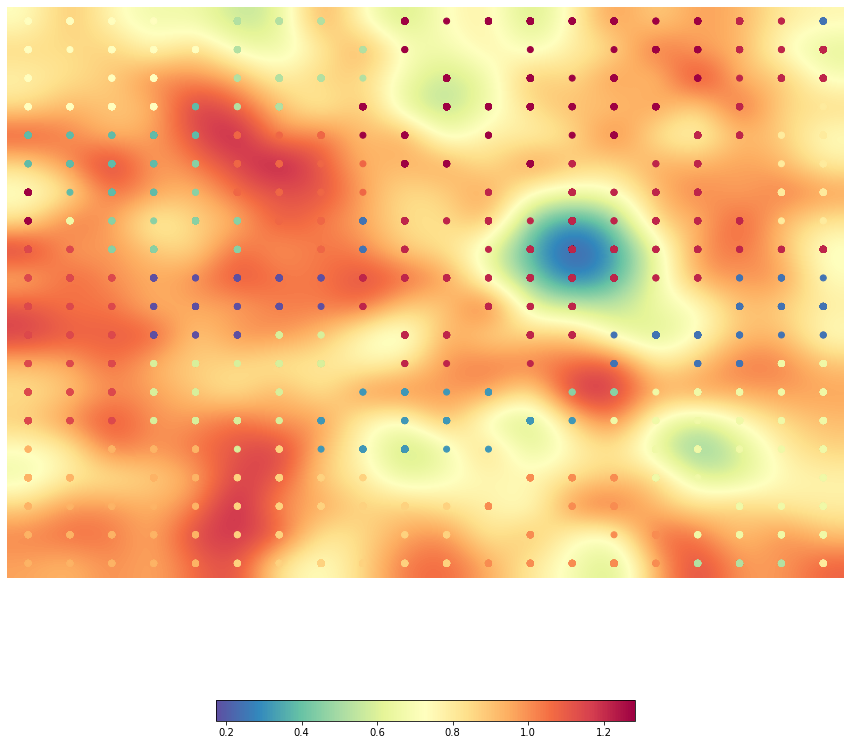

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

In [172]:
from sklearn.cluster import KMeans
alg = KMeans(n_clusters=17)
%time som.cluster(algorithm=alg)
som.view_umatrix(bestmatches=True, colorbar=True, figsize=(15, 15))

In [173]:
print(som.clusters)

[[ 8  8  8  8 16  5  5  5 16 16 16 16 16 16 16 16 16 15 15  1]
 [ 8  8  8  8  8  5  5  5  5 16 16 16 16 16 16 16 16 15 15 15]
 [ 8  8  8  8  8  5  5  5  5 16 16 16 16 16 16 16 16 15 15 15]
 [ 8  8  8  8  3  5  5  5 16 16 16 16 16 16 16 16 15 15 15  9]
 [ 3  3  3  3  3 13 13 13 16 16 16 16 16 16 16 15 15 15  9  9]
 [ 3  3  3  3  4 13 13 13 13 16 16 16 16 15 16 15 15 15  9  9]
 [16  3  3  3  4 13 13 13 13 15 15 15 15 15 15 15 15  9  9  9]
 [16  7  4  4  4  4 13 13  1 15 15 15 15 15 15 15 15 15  9  9]
 [14 14  4  4  4  4  4 13  1 15 15 15 15 15 15 15 15 15 15 15]
 [14 14 14  0  0  0  0  0 15 15 15 15 15 15 15 15 15  1  1  1]
 [14 14 14  0  0  0  0  0 15 15 15 15 15 15 15  1  1  1  1  1]
 [14 14 14  0  0  0  6  6 15 15 15 15 15 15  1  1  1  1  1  1]
 [14 14 14  6  6  6  6  6  6 15 15  2 15 15  1  1  1  1  7  7]
 [14 14 14  6  6  6  6  6  2  2  2  2  2  4  4  7  7  7  7  7]
 [14 14 14  6  6  6  6  2  2  2  2  2  2  2  7  7  7  7  7  7]
 [11 11 11 11 11  6 10  2  2  2  2  2  2 12  7  7  7  7

In [174]:
clusters = som.clusters
uclusters ,counts = np.unique(clusters , return_counts=True)
sorted_counts = np.argsort(counts , )
uclusters = uclusters[sorted_counts][::-1]
counts = counts[sorted_counts][::-1]
uclustersDict = dict(zip(uclusters,counts))
print('(cluster, neurons) pairs : ')
print(uclustersDict)

(cluster, neurons) pairs : 
{15: 72, 16: 48, 7: 33, 11: 25, 10: 23, 1: 21, 2: 21, 14: 20, 12: 20, 6: 18, 8: 18, 5: 17, 13: 14, 4: 13, 3: 13, 0: 13, 9: 11}


In [175]:
bmus = som.bmus
ubmus, indices = np.unique(bmus, return_inverse=True, axis=0)
print(ubmus.shape)

(338, 2)


In [176]:
neurons_movies_report(print_cluster_neurons_movies_report(15))

[('Drama', 368), ('Comedy', 300), ('Short Film', 192), ('Romance Film', 188), ('World cinema', 172), ('Thriller', 171), ('Musical', 128), ('Horror', 100), ('Romantic drama', 92), ('Bollywood', 91), ('Black-and-white', 82), ('Adventure', 80), ('War film', 75), ('Science Fiction', 75), ('Animation', 70), ('Indie', 69), ('Action', 68), ('Family Film', 66), ('Action/Adventure', 65), ('Fantasy', 65), ('Comedy-drama', 55), ('Crime Fiction', 54), ('Mystery', 50), ('Film adaptation', 49), ('Psychological thriller', 46), ('Romantic comedy', 38), ('Period piece', 36), ("Children\\'s/Family", 36), ('Comedy film', 31), ('Supernatural', 28), ('Black comedy', 26), ('Japanese Movies', 24), ('Teen', 23), ('Slapstick', 23), ('Satire', 19), ('Cult', 19), ("Children\\'s", 18), ('Sports', 16), ('Coming of age', 16), ('Computer Animation', 16), ("Children\\'s Fantasy", 16), ('Suspense', 16), ('Film noir', 15), ('Documentary', 15), ('Chinese Movies', 15), ('Western', 14), ('Parody', 12), ('Television movie'

In [177]:
neurons_movies_report(print_cluster_neurons_movies_report(16))

[('Drama', 234), ('Action', 139), ('Indie', 96), ('World cinema', 89), ('Adventure', 85), ('Comedy', 81), ('Horror', 70), ('Thriller', 67), ('Romance Film', 62), ('Romantic drama', 59), ('Action/Adventure', 57), ('Black-and-white', 47), ('Science Fiction', 43), ('Animation', 37), ('Crime Fiction', 34), ('Slasher', 30), ('Comedy-drama', 28), ('Family Film', 25), ('Fantasy', 24), ('Silent film', 24), ('Slapstick', 21), ('Melodrama', 19), ('War film', 17), ('Musical', 16), ('Chinese Movies', 16), ('Cult', 16), ('Political drama', 16), ('Psychological thriller', 16), ('Romantic comedy', 16), ('Parody', 15), ('Historical fiction', 14), ('Action Thrillers', 13), ('Comedy film', 13), ('Mystery', 12), ('Buddy film', 11), ('Filipino Movies', 11), ('Period piece', 11), ('Teen', 11), ('Sports', 11), ('Art film', 11), ('Documentary', 10), ('Japanese Movies', 10), ('Family Drama', 10), ('Coming of age', 9), ("Children\\'s/Family", 8), ('Short Film', 8), ('Costume drama', 8), ('Film adaptation', 8),

In [178]:
neurons_movies_report(print_cluster_neurons_movies_report(11))

[('Drama', 105), ('Romance Film', 63), ('Crime Fiction', 61), ('Comedy', 53), ('Thriller', 35), ('Indie', 33), ('Short Film', 32), ('Action', 31), ('Black-and-white', 26), ('Silent film', 24), ('Mystery', 17), ('Horror', 17), ('Musical', 15), ('Black comedy', 12), ('Comedy film', 11), ('World cinema', 11), ('Psychological thriller', 11), ('Adventure', 10), ('Supernatural', 9), ('Coming of age', 8), ('Crime Drama', 7), ('Fantasy', 7), ('Film adaptation', 6), ('Crime Comedy', 6), ('Science Fiction', 6), ('Family Film', 6), ('Comedy-drama', 5), ('Teen', 4), ('Heist', 4), ('Sex comedy', 4), ('Slapstick', 4), ('Bollywood', 4), ('Japanese Movies', 3), ('Gangster Film', 3), ('Period piece', 3), ('Sports', 2), ('Film noir', 2), ('Suspense', 2), ('Television movie', 2), ('Crime Thriller', 2), ('Cult', 2), ('Caper story', 2), ('Buddy film', 2), ('Fantasy Comedy', 2), ('Biography', 2), ('Romantic drama', 2), ('Biographical film', 2), ('Animal Picture', 2), ('Workplace Comedy', 2), ('Political thr

In [179]:
neurons_movies_report(print_cluster_neurons_movies_report(8))

[('Drama', 216), ('Comedy', 170), ('Crime Fiction', 119), ('Thriller', 102), ('Action', 85), ('Crime Thriller', 44), ('Action/Adventure', 42), ('Romance Film', 30), ('Black-and-white', 27), ('Silent film', 27), ('Mystery', 26), ('Documentary', 24), ('Adventure', 19), ('Fantasy', 19), ('Psychological thriller', 18), ('Gangster Film', 16), ('Culture & Society', 14), ('Suspense', 13), ('Film noir', 13), ('Family Film', 13), ('Sports', 11), ('Indie', 11), ("Children\\'s/Family", 11), ('World cinema', 11), ('Musical', 11), ('War film', 11), ('Film adaptation', 10), ('Biography', 10), ('Science Fiction', 10), ('Romantic comedy', 10), ('Television movie', 9), ("Children\\'s Fantasy", 9), ('Buddy film', 7), ('Teen', 7), ('Black comedy', 7), ('Bollywood', 6), ('Crime Drama', 6), ('Social issues', 6), ('Short Film', 6), ('Chinese Movies', 6), ('History', 6), ('Period piece', 6), ('Spy', 5), ('Political cinema', 5), ('Heist', 5), ('Fantasy Comedy', 4), ('Biographical film', 4), ('Musical comedy',

In [171]:
neurons_movies_report(print_cluster_neurons_movies_report(6))

[('Drama', 102), ('Romance Film', 63), ('Crime Fiction', 58), ('Comedy', 51), ('Thriller', 35), ('Short Film', 32), ('Indie', 32), ('Action', 31), ('Black-and-white', 26), ('Silent film', 24), ('Mystery', 17), ('Horror', 14), ('Musical', 12), ('World cinema', 11), ('Psychological thriller', 11), ('Black comedy', 11), ('Adventure', 10), ('Comedy film', 9), ('Supernatural', 8), ('Fantasy', 7), ('Coming of age', 7), ('Crime Drama', 7), ('Crime Comedy', 6), ('Science Fiction', 6), ('Film adaptation', 6), ('Family Film', 6), ('Comedy-drama', 4), ('Bollywood', 4), ('Sex comedy', 4), ('Heist', 4), ('Slapstick', 4), ('Japanese Movies', 3), ('Gangster Film', 3), ('Period piece', 3), ('Sports', 2), ('Biography', 2), ('Crime Thriller', 2), ('Cult', 2), ('Suspense', 2), ('Teen', 2), ('Caper story', 2), ('Buddy film', 2), ('Romantic drama', 2), ('Television movie', 2), ('Political thriller', 2), ('Biographical film', 2), ('Animal Picture', 2), ('Workplace Comedy', 2), ('Comedy Thriller', 1), ('Surr

Παρατηρούμε πάλι ότι η διάταξη είναι χειρότερη από αυτή που είχαμε για 15 clusters οπότε θα αυξήσουμε το μέγεθος του grid για να συνεχίστεί η διερεύνηση.

# Grid Size = 30 

In [180]:
som = run_som_grid_clusters(30, finalSet, 'som30grid.pkl')
#som = joblib.load('som30grid.pkl')

## Clusters = 18

CPU times: user 7.64 s, sys: 5.21 s, total: 12.9 s
Wall time: 6.56 s


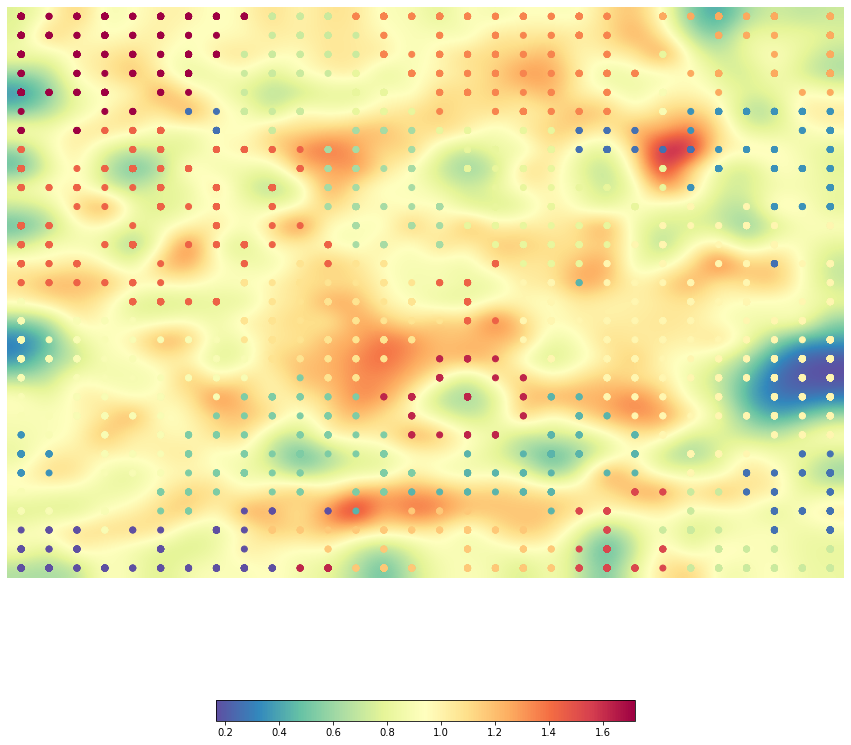

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

In [190]:
from sklearn.cluster import KMeans
alg = KMeans(n_clusters=18)
%time som.cluster(algorithm=alg)
som.view_umatrix(bestmatches=True, colorbar=True, figsize=(15, 15))

In [203]:
with open('cluster30-grid18.txt', 'w+') as f:
  for x in som.clusters:
    for y in x:
      if y >= 10:
        f.write(str(y) + ' ')
      else:
        f.write('0' + str(y) + ' ')
    f.write('\n')

In [204]:
clusters = som.clusters
uclusters ,counts = np.unique(clusters , return_counts=True)
sorted_counts = np.argsort(counts , )
uclusters = uclusters[sorted_counts][::-1]
counts = counts[sorted_counts][::-1]
uclustersDict = dict(zip(uclusters,counts))
print('(cluster, neurons) pairs : ')
print(uclustersDict)

(cluster, neurons) pairs : 
{9: 129, 14: 110, 8: 76, 7: 56, 13: 55, 4: 51, 17: 50, 6: 48, 10: 44, 2: 38, 3: 37, 11: 34, 0: 33, 5: 32, 1: 32, 12: 30, 16: 28, 15: 17}


In [205]:
bmus = som.bmus
ubmus, indices = np.unique(bmus, return_inverse=True, axis=0)
print(ubmus.shape)

(667, 2)


In [206]:
neurons_movies_report(print_cluster_neurons_movies_report(9))

[('Drama', 426), ('Comedy', 263), ('Short Film', 186), ('Romance Film', 184), ('Black-and-white', 176), ('Thriller', 167), ('Crime Fiction', 126), ('World cinema', 116), ('Silent film', 105), ('Indie', 95), ('Romantic drama', 92), ('Musical', 89), ('Animation', 87), ('Horror', 82), ('Romantic comedy', 82), ('Mystery', 80), ('Family Film', 76), ('Action', 76), ('Crime Thriller', 63), ('Action/Adventure', 58), ('Fantasy', 48), ('Bollywood', 47), ('Comedy film', 43), ('Period piece', 42), ('Adventure', 41), ('Film adaptation', 39), ('Psychological thriller', 34), ('Family Drama', 30), ('Comedy-drama', 29), ('Science Fiction', 26), ('War film', 24), ('Slasher', 23), ('Black comedy', 22), ('Chinese Movies', 21), ('Japanese Movies', 20), ('Melodrama', 19), ('Sports', 18), ('Suspense', 18), ('Biography', 17), ('Television movie', 17), ('Supernatural', 17), ('Political drama', 17), ('Art film', 15), ('B-movie', 15), ('Film noir', 14), ('Coming of age', 14), ('Biographical film', 13), ('Creatur

In [195]:
neurons_movies_report(print_cluster_neurons_movies_report(14))

[('Drama', 302), ('Thriller', 151), ('Horror', 128), ('Romance Film', 120), ('Action', 105), ('World cinema', 76), ('Romantic drama', 64), ('Science Fiction', 61), ('Black-and-white', 45), ('Comedy', 38), ('Action/Adventure', 38), ('Psychological thriller', 36), ('Indie', 34), ('Adventure', 24), ('Comedy film', 24), ('Family Film', 22), ('Mystery', 22), ('Silent film', 19), ('Crime Fiction', 18), ('Family Drama', 18), ('Fantasy', 18), ('Supernatural', 17), ('Biographical film', 15), ('Film adaptation', 15), ('Musical', 14), ("Children\\'s/Family", 12), ('Comedy-drama', 12), ('Suspense', 11), ('Short Film', 11), ('War film', 9), ('Melodrama', 9), ('Television movie', 9), ('Romantic comedy', 9), ('Bollywood', 9), ('Crime Thriller', 9), ('Film noir', 8), ('Political drama', 7), ('Chinese Movies', 7), ('Documentary', 7), ('Political thriller', 6), ('Action Thrillers', 6), ('Martial Arts Film', 6), ('Japanese Movies', 5), ('Art film', 5), ('Sci-Fi Horror', 5), ('Biopic [feature]', 5), ('Chi

In [196]:
neurons_movies_report(print_cluster_neurons_movies_report(8))

[('Drama', 168), ('Comedy', 119), ('Horror', 72), ('Action', 64), ('Romance Film', 53), ('Indie', 49), ('Short Film', 48), ('Thriller', 47), ('Family Film', 47), ('Musical', 46), ('Action/Adventure', 44), ('World cinema', 39), ('Black-and-white', 38), ('Slasher', 36), ('Comedy-drama', 33), ('Animation', 33), ('Crime Fiction', 29), ('Science Fiction', 28), ('Teen', 27), ('Cult', 24), ('Period piece', 20), ('Fantasy', 19), ('Parody', 19), ('Comedy film', 17), ('Adventure', 17), ('Coming of age', 17), ('Romantic comedy', 16), ('Sports', 16), ('Film adaptation', 15), ('Mystery', 15), ('Satire', 14), ('War film', 13), ('Black comedy', 12), ('Japanese Movies', 12), ('Silent film', 11), ('Western', 10), ("Children\\'s/Family", 9), ('Psychological thriller', 7), ('Zombie Film', 7), ('Supernatural', 7), ('Political drama', 6), ('Television movie', 6), ("Children\\'s", 6), ('Crime Thriller', 5), ('Buddy film', 5), ('Film noir', 5), ('Melodrama', 5), ('Mockumentary', 5), ('Spy', 5), ('Suspense', 

In [197]:
neurons_movies_report(print_cluster_neurons_movies_report(7))

[('Drama', 100), ('Romance Film', 70), ('Comedy', 47), ('World cinema', 45), ('Thriller', 44), ('Action', 35), ('Action/Adventure', 28), ('Adventure', 22), ('Mystery', 22), ('Family Film', 21), ('Crime Fiction', 20), ('Science Fiction', 19), ('Black-and-white', 18), ('Crime Thriller', 17), ('Psychological thriller', 15), ('Short Film', 12), ('Black comedy', 10), ('Music', 10), ('Documentary', 9), ('Horror', 9), ('Film adaptation', 8), ('Suspense', 7), ('Cult', 6), ('Sex comedy', 6), ('Chinese Movies', 5), ('Indie', 5), ('Television movie', 5), ('Martial Arts Film', 5), ('Action Thrillers', 5), ('Romantic comedy', 5), ('Fantasy', 4), ('Political drama', 4), ('Biographical film', 4), ('Biography', 4), ("Children\\'s/Family", 4), ('Musical', 3), ('Slapstick', 3), ('Japanese Movies', 3), ('Doomsday film', 3), ('Biopic [feature]', 3), ('Period piece', 3), ('Western', 3), ('Spy', 3), ('Fantasy Comedy', 2), ('Detective fiction', 2), ('Filipino Movies', 2), ('Comedy of manners', 2), ('Sports',

In [198]:
neurons_movies_report(print_cluster_neurons_movies_report(13))

[('Drama', 88), ('World cinema', 57), ('Japanese Movies', 41), ('Action/Adventure', 37), ('Adventure', 36), ('Fantasy', 28), ('Action', 27), ('Thriller', 25), ('Crime Fiction', 23), ('Comedy', 23), ('Western', 17), ('Family Film', 17), ('Romance Film', 16), ('Horror', 14), ('War film', 13), ('Science Fiction', 12), ('Short Film', 12), ('Black-and-white', 12), ('Animation', 9), ('Anime', 9), ('Indie', 8), ('Action Thrillers', 8), ('Cult', 7), ('Parody', 7), ('Slapstick', 6), ('Musical', 6), ('Romantic drama', 6), ('Psychological thriller', 6), ('Documentary', 5), ('Costume drama', 5), ("Children\\'s/Family", 5), ('Docudrama', 5), ('Period piece', 5), ('Martial Arts Film', 4), ('Television movie', 4), ('Film adaptation', 4), ('Comedy film', 4), ('Supernatural', 4), ('Slasher', 4), ("Children\\'s", 3), ('Fantasy Adventure', 3), ('Costume Adventure', 3), ('Coming of age', 3), ('Musical Drama', 3), ('Sports', 3), ('Mystery', 3), ('Screwball comedy', 3), ('Slice of life story', 3), ('Politic

Η διάταξη σε αυτό το χάρτη δεν έχει συνοχή ως προς την πρώτη κατηγορία. Η συνολική κατηγοριοποίηση είναι χειρότερη από το αποτέλεσμα που προέκυψε για grid size = 20 και 15 clusters.

## Clusters = 30

CPU times: user 10.9 s, sys: 6.65 s, total: 17.6 s
Wall time: 9.05 s


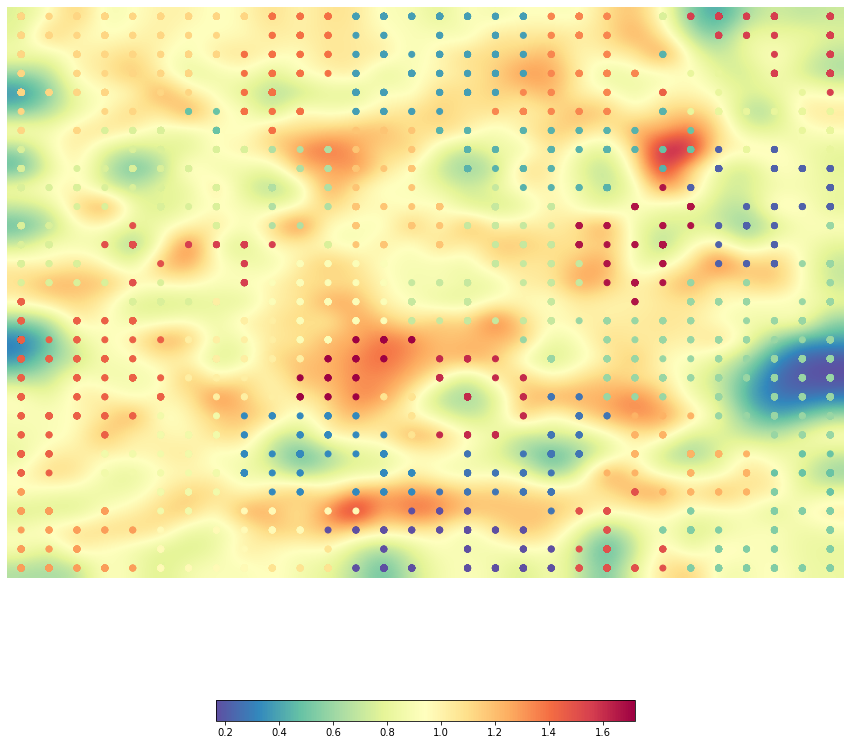

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

In [217]:
from sklearn.cluster import KMeans
alg = KMeans(n_clusters=30)
%time som.cluster(algorithm=alg)
som.view_umatrix(bestmatches=True, colorbar=True, figsize=(15, 15))

In [218]:
print(som.clusters)
with open('cluster10-grid30.txt', 'w+') as f:
  for x in som.clusters:
    for y in x:
      if y >= 10:
        f.write(str(y) + ' ')
      else:
        f.write('0' + str(y) + ' ')
    f.write('\n')

[[18 18 18 18 18 18 18 18 18 23 23 23  4  4  4  4  4  4  4 22 22 22 11 11
  26 26 26 26 26 26]
 [18 18 18 18 18 18 18 18 23 23 23 23  4  4  4  4  4  4  4 22 22 22 22 11
  26 26 26 26 26 26]
 [18 18 18 18 18 18 18 18 23 23 23 23  4  4  4  4  4  4  4 22 22 22 22  5
  12 12 26 26 26 26]
 [18 18 18 18 18 18 18 18 23 23 23 23  4  4  4  4  4  4  4 22 22 22 22 22
  12 12 12 26 26 26]
 [18 18 18 18 18 18 18 23 23 23 23  4  4  4  4  4  4  4 22 22 22 22 22 24
  24 12 12 12 12 26]
 [18 18 18 18 18 11  6  6 23 23 23 23  4  4  4  4  4 22 22 22 22 22 22  5
  12 12 12 12 12 12]
 [18 18 18 11 11 11 11  6  6 23 23 19 19 19 19  5  5  5  5  5  5  5  5  6
   6 12 12 12 12 12]
 [11 11 18 11 11 11 11 11 11  9  9  9 19 19 19  5  5  5  5  5  5  5  5  6
   6  1 12  1  1 12]
 [11 11 11 11 11 11 11 11 11  9  9  9 19 19 19  5  5  5  5  5  5  5  5  5
   1  1  1  1  1  1]
 [11 11 11 11 11 11 11 11  9  9  9  9 19 19 19 19  5 10  5  5  5  5  5 28
   1  1  1  1  1  1]
 [11 11 11 11 11 11 11 11 11  9  9  9 19 19 19 19 

In [219]:
clusters = som.clusters
uclusters ,counts = np.unique(clusters , return_counts=True)
sorted_counts = np.argsort(counts , )
uclusters = uclusters[sorted_counts][::-1]
counts = counts[sorted_counts][::-1]
uclustersDict = dict(zip(uclusters,counts))
print('(cluster, neurons) pairs : ')
print(uclustersDict)

(cluster, neurons) pairs : 
{8: 82, 11: 70, 24: 52, 18: 49, 10: 42, 4: 40, 5: 35, 3: 32, 1: 31, 0: 30, 2: 30, 26: 28, 22: 27, 7: 27, 19: 26, 23: 25, 25: 24, 16: 23, 13: 23, 20: 22, 21: 22, 15: 22, 28: 22, 12: 22, 14: 20, 27: 20, 6: 15, 9: 15, 29: 14, 17: 10}


In [220]:
bmus = som.bmus
ubmus, indices = np.unique(bmus, return_inverse=True, axis=0)
print(ubmus.shape)

(667, 2)


Εδώ, οι πιο πολλοί νευρώνες συγκεντρώνονται στα clusters 8, 11, 24, 18, 10. Θα δοκιμαστούν τα αποτελέσματα των clusters 8, 24 και 16.

In [221]:
neurons_movies_report(print_cluster_neurons_movies_report(8))

[('Drama', 257), ('Comedy', 207), ('Romance Film', 135), ('Black-and-white', 128), ('Thriller', 119), ('Short Film', 100), ('Silent film', 100), ('World cinema', 83), ('Horror', 78), ('Animation', 76), ('Crime Fiction', 75), ('Indie', 66), ('Romantic comedy', 64), ('Family Film', 63), ('Romantic drama', 60), ('Mystery', 55), ('Musical', 51), ('Action', 49), ('Crime Thriller', 43), ('Action/Adventure', 37), ('Period piece', 37), ('Adventure', 32), ('Psychological thriller', 32), ('Fantasy', 31), ('Film adaptation', 30), ('Bollywood', 23), ('Family Drama', 23), ('Slasher', 21), ('War film', 21), ('Science Fiction', 19), ('Comedy film', 18), ('Chinese Movies', 18), ('Supernatural', 17), ('Biography', 16), ('B-movie', 15), ('Sports', 15), ('Melodrama', 15), ('Art film', 14), ('Documentary', 13), ('Suspense', 13), ('Film noir', 12), ('Culture & Society', 12), ('Creature Film', 12), ('Japanese Movies', 12), ('Television movie', 12), ('Comedy-drama', 11), ('Coming of age', 10), ('Political dr

In [222]:
neurons_movies_report(print_cluster_neurons_movies_report(24))

[('Drama', 153), ('Comedy', 106), ('Comedy film', 74), ('Family Film', 73), ('Short Film', 70), ('Thriller', 62), ('Horror', 61), ('Action', 61), ('Animation', 55), ('Indie', 50), ('Musical', 47), ('Romance Film', 44), ('Action/Adventure', 39), ('Black-and-white', 38), ('Comedy-drama', 30), ('Crime Fiction', 30), ('World cinema', 29), ('Teen', 22), ('Science Fiction', 21), ('Mystery', 20), ('Cult', 19), ('Psychological thriller', 18), ('Adventure', 16), ('Parody', 16), ('Romantic comedy', 16), ('Melodrama', 16), ('Coming of age', 15), ('Slasher', 14), ('Period piece', 14), ('Western', 13), ('Silent film', 12), ('Japanese Movies', 12), ('Film adaptation', 11), ('Satire', 11), ('Sports', 11), ('Supernatural', 9), ("Children\\'s/Family", 9), ('Suspense', 8), ('War film', 7), ('Fantasy', 7), ('Zombie Film', 6), ('Black comedy', 5), ('Spy', 5), ('Disaster', 5), ('Film noir', 5), ('Domestic Comedy', 5), ('Political cinema', 5), ('Political satire', 5), ('Crime Thriller', 4), ("Children\\'s",

In [223]:
neurons_movies_report(print_cluster_neurons_movies_report(16))

[('Drama', 63), ('Horror', 27), ('Thriller', 24), ('Slasher', 22), ('Comedy', 21), ('Crime Fiction', 19), ('World cinema', 17), ('Crime Thriller', 17), ('Action', 15), ('Indie', 14), ('Adventure', 12), ('Science Fiction', 12), ('Fantasy', 9), ('Teen', 7), ('Film adaptation', 7), ('Family Film', 7), ('Television movie', 7), ('Action/Adventure', 7), ('Gangster Film', 6), ('Musical', 5), ('Parody', 5), ('Crime Drama', 5), ('Black comedy', 5), ('Period piece', 5), ('Sports', 5), ('Satire', 4), ('Slapstick', 4), ('War film', 4), ("Children\\'s/Family", 3), ('Comedy-drama', 3), ('Romance Film', 3), ('Culture & Society', 2), ('Film noir', 2), ('Cult', 2), ('Family Drama', 2), ('Erotic thriller', 2), ('Creature Film', 2), ('Courtroom Drama', 2), ('Zombie Film', 2), ('Costume drama', 2), ('Road movie', 2), ('Tamil cinema', 2), ('Adventure Comedy', 2), ('Supernatural', 2), ('Mockumentary', 2), ('Short Film', 2), ('Political thriller', 2), ("Children\\'s", 2), ('Music', 2), ('Biography', 1), ('Bi

και εδώ ο χάρτης δεν είναι τόσο καλός. Τα clusters 8 και 24 είναι σε δύο άκρα του χάρτη άρα θα  έπρεπε να είναι σημασιολογικά μακρινά. Παρόλ αυτά όμως έχουν ίδιες κατηγορίες ταινιών. 

## Συμπεράσματα δεύτερου μέρους

Από τους συνδυασμούς που δοκιμάστηκαν στο μέρος 2 αυτός που έδωσε τα πιο ικανοποιητικά αποτελέσματα είναι το μέγεθος πλέγματος 20 με 15 κατηγορίες. Στο grid με μέγεθος πλευράς 30 τα αποτελέσματα δεν είχαν διάταξη. 

<br>

Ενδεχωμένως να υπάρχει κάποιο καλύτερο μέγεθος πλέγματος στο διάστημα (20, 30). Όσο αυξάνεται ο αριθμός του πλέγματος δεν σημαίνει απαραίτητα ότι η ποιότητα βελτιώνεται και πολλοί νευρώνες μένουν αχρησιμοποίητοι κάτι το οποίο ίσως υποδηλώμει κορεσμό. 

<br>

Ο χάρτης som που κατασκυάστηκε εν τέλει χρειάζεται πολλές βελτιώσεις και ίσως να κουβαλάει και λάθη από το μέρος ένα (tfidf vectorizer). Ωστόσο, σε κάποια συγκεκριμένα clusters δίνει καλά αποτελέσματα και αυτό είναι το ενθαρυντικό. 

<br>

Ένα πρόβλημα το οποίο παρατηρήθηκε είναι ότι η συντριπτική πλειοψηφία των ταινιών περιείχε σαν κατηγορία το 'drama'. Για το λόγο αυτό σχεδόν σε όλα τα clusters υπήρχε και το drαma και μάλιστα με μεγάλη συχνότητα. Θα μπορούσαμε να εφαρμόσουμε κάποια τεχνική όπως oversampling για να σταθμίσουμε τις κατηγορίες αλλά αυτό θα δημιουργούσε πολλά νέα δείγματα και θα εκτόξευε τους χρόνους εκπαίδευσης. 